In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#ini aku latihan lagi

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import pandas as pd

def scan_dataset(base_path):
    dataset_structure = []
    for root, dirs, files in os.walk(base_path):
        wav_files = [f for f in files if f.endswith('.wav')]
        for wav in wav_files:
            wav_path = os.path.join(root, wav)
            event_path = wav_path.replace('.wav', '-events.txt')
            has_event = os.path.exists(event_path)
            dataset_structure.append({
                "species_folder": os.path.relpath(root, base_path).split(os.sep)[0],
                "subfolder": os.path.relpath(root, base_path),
                "wav_file": wav,
                "has_event_txt": has_event,
                "wav_path": wav_path,
                "event_path": event_path if has_event else None
            })
    return pd.DataFrame(dataset_structure)

base_path = "/content/drive/MyDrive/kpsb_dataset/kpsb_plantE"
dataset_df = scan_dataset(base_path)

In [ ]:
import os
import pandas as pd

def scan_dataset(base_path):
    dataset_structure = [] '''ini digunakan untuk pendifinisian fungsi yang bernama scan_dataset,
    #parameternya base_path yaitu path ke folder utama dataset, fungsi ini tujuannya untuk menelusuri isi folder dan sub folder lalu mencatat struktur data dari file .wav
    dan file event-nya kalau ada dan akan membuat list kosong yang akan diisi dengan data struktur datset '''
    for root, dirs, files in os.walk(base_path):
      wav_files = [f for f in files if f.endswith('.wav')]




SyntaxError: invalid syntax (<ipython-input-4-e7be6d76703f>, line 5)

In [ ]:
dataset_df

species_folder                           subfolder  \
0        Araucaria                           Araucaria   
1        Araucaria                           Araucaria   
2        Araucaria                           Araucaria   
3        Araucaria                           Araucaria   
4        Araucaria                           Araucaria   
..             ...                                 ...   
356        Solanum              Solanum/Tomate Colegio   
357        Solanum              Solanum/Tomate Colegio   
358        Solanum  Solanum/Tomate Colegio/Ground Stem   
359        Solanum  Solanum/Tomate Colegio/Ground Stem   
360      Trifolium                           Trifolium   

                                  wav_file  has_event_txt  \
0    BYB_Recording_2022-10-14_09.09.29.wav           True   
1    BYB_Recording_2022-10-25_11.09.11.wav           True   
2    BYB_Recording_2022-10-25_11.18.57.wav           True   
3    BYB_Recording_2022-10-25_11.21.08.wav           True   
4    BYB_Recording_2022-10-25_11.27.44.wav           True   
..                                     ...            ...   
356  BYB_Recording_2023-01-05_16.43.30.wav           True   
357  BYB_Recording_2023-01-05_16.48.06.wav           True   
358  BYB_Recording_2022-10-25_11.00.15.wav           True   
359  BYB_Recording_2022-10-25_11.02.54.wav           True   
360  BYB_Recording_2023-07-19_10.50.28.wav           True   

                                              wav_path  \
0    /content/drive/MyDrive/kpsb_dataset/kpsb_plant...   
1    /content/drive/MyDrive/kpsb_dataset/kpsb_plant...   
2    /content/drive/MyDrive/kpsb_dataset/kpsb_plant...   
3    /content/drive/MyDrive/kpsb_dataset/kpsb_plant...   
4    /content/drive/MyDrive/kpsb_dataset/kpsb_plant...   
..                                                 ...   
356  /content/drive/MyDrive/kpsb_dataset/kpsb_plant...   
357  /content/drive/MyDrive/kpsb_dataset/kpsb_plant...   
358  /content/drive/MyDrive/kpsb_dataset/kpsb_plant...   
359  /content/drive/MyDrive/kpsb_dataset/kpsb_plant...   
360  /content/drive/MyDrive/kpsb_dataset/kpsb_plant...   

                                            event_path  
0    /content/drive/MyDrive/kpsb_dataset/kpsb_plant...  
1    /content/drive/MyDrive/kpsb_dataset/kpsb_plant...  
2    /content/drive/MyDrive/kpsb_dataset/kpsb_plant...  
3    /content/drive/MyDrive/kpsb_dataset/kpsb_plant...  
4    /content/drive/MyDrive/kpsb_dataset/kpsb_plant...  
..                                                 ...  
356  /content/drive/MyDrive/kpsb_dataset/kpsb_plant...  
357  /content/drive/MyDrive/kpsb_dataset/kpsb_plant...  
358  /content/drive/MyDrive/kpsb_dataset/kpsb_plant...  
359  /content/drive/MyDrive/kpsb_dataset/kpsb_plant...  
360  /content/drive/MyDrive/kpsb_dataset/kpsb_plant...  

[361 rows x 6 columns]

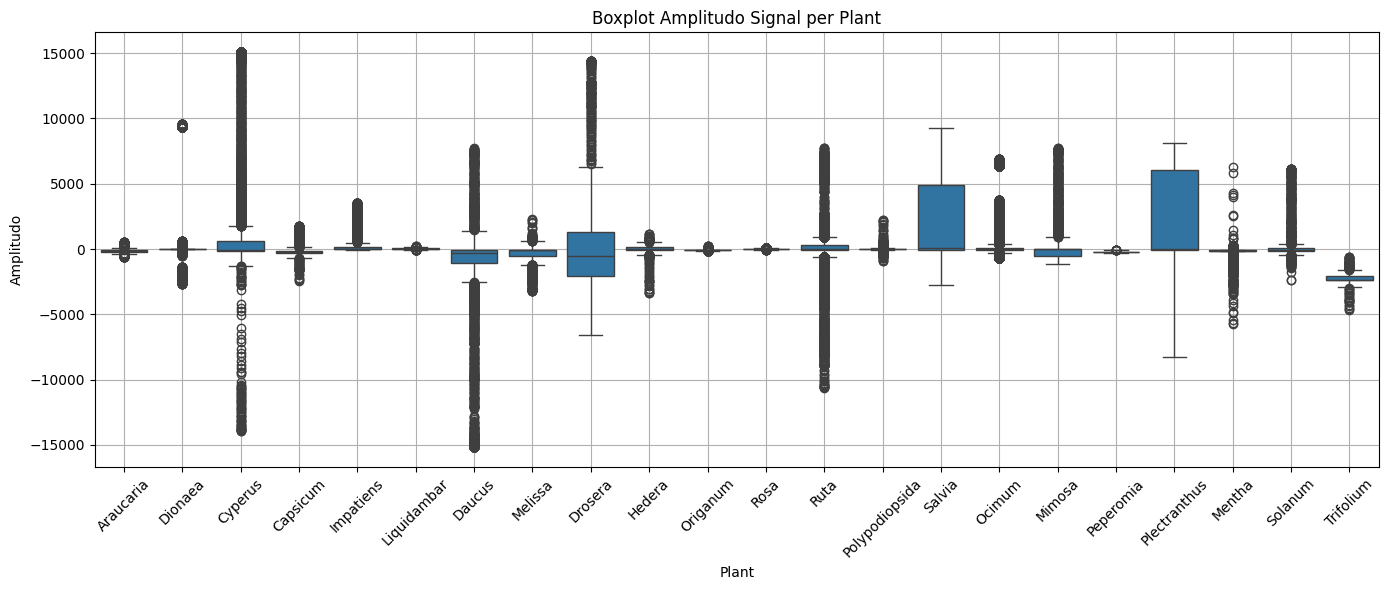

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import wavfile

def scan_and_collect_amplitudes(base_path, step=100):
    amplitude_records = []

    for root, dirs, files in os.walk(base_path):
        wav_files = [f for f in files if f.endswith(".wav")]

        if not wav_files:
            continue

        for wav_file in wav_files[:1]:  # hanya ambil satu file per folder tanaman
            wav_path = os.path.join(root, wav_file)
            try:
                sr, signal = wavfile.read(wav_path)
                if signal.ndim > 1:
                    signal = signal[:, 0]

                sampled_signal = signal[::step]
                sampled_signal = sampled_signal.astype(np.float32)

                # Ambil nama tanaman dari struktur folder
                plant_name = os.path.relpath(root, base_path).split(os.sep)[0]

                for amp in sampled_signal:
                    amplitude_records.append({"Plant": plant_name, "Amplitude": amp})
            except Exception as e:
                print(f"Error reading {wav_path}: {e}")

    return pd.DataFrame(amplitude_records)

df_amplitudes = scan_and_collect_amplitudes(base_path)

plt.figure(figsize=(14, 6))
sns.boxplot(data=df_amplitudes, x="Plant", y="Amplitude")
plt.xticks(rotation=45)
plt.title("Boxplot Amplitudo Signal per Plant")
plt.xlabel("Plant")
plt.ylabel("Amplitudo")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import os
import librosa
import scipy.stats
from tqdm import tqdm

# 1. Scan semua .wav dan pasangannya
def scan_dataset(base_path):
    dataset_structure = []
    for root, dirs, files in os.walk(base_path):
        wav_files = [f for f in files if f.endswith('.wav')]
        for wav in wav_files:
            wav_path = os.path.join(root, wav)
            event_path = wav_path.replace('.wav', '-events.txt')
            has_event = os.path.exists(event_path)
            dataset_structure.append({
                "species_folder": os.path.relpath(root, base_path).split(os.sep)[0],
                "subfolder": os.path.relpath(root, base_path),
                "wav_file": wav,
                "has_event_txt": has_event,
                "wav_path": wav_path,
                "event_path": event_path if has_event else None
            })
    return pd.DataFrame(dataset_structure)

# 2. Ekstrak fitur statistik dari sinyal
def extract_features(file_path):
    try:
        signal, sr = librosa.load(file_path, sr=None)
        zcr = np.mean(librosa.feature.zero_crossing_rate(signal))
        return {
            "duration_sec": len(signal) / sr,
            "sampling_rate": sr,
            "min_amplitude": np.min(signal),
            "max_amplitude": np.max(signal),
            "mean_amplitude": np.mean(signal),
            "std_amplitude": np.std(signal),
            "skewness": scipy.stats.skew(signal),
            "kurtosis": scipy.stats.kurtosis(signal),
            "zero_crossing_rate": zcr
        }
    except Exception as e:
        print(f"Error in {file_path}: {e}")
        return {
            "duration_sec": None,
            "sampling_rate": None,
            "min_amplitude": None,
            "max_amplitude": None,
            "mean_amplitude": None,
            "std_amplitude": None,
            "skewness": None,
            "kurtosis": None,
            "zero_crossing_rate": None
        }

# 3. Jalankan
base_path = "/content/drive/MyDrive/kpsb_dataset/kpsb_plantE"
dataset_df = scan_dataset(base_path)

# 4. Tambahkan kolom fitur ke dataframe
feature_list = []
for i, row in tqdm(dataset_df.iterrows(), total=len(dataset_df)):
    features = extract_features(row['wav_path'])
    feature_list.append(features)

features_df = pd.DataFrame(feature_list)
final_df = pd.concat([dataset_df, features_df], axis=1)

# 5. Tampilkan hasil
import matplotlib.pyplot as plt
from IPython.display import display
pd.set_option('display.max_rows', None)
display(final_df)

# Optional: simpan ke Excel/CSV
# final_df.to_csv("summary_signal_features.csv", index=False)

100%|██████████| 361/361 [02:39<00:00,  2.26it/s]


species_folder                                          subfolder  \
0         Araucaria                                          Araucaria   
1         Araucaria                                          Araucaria   
2         Araucaria                                          Araucaria   
3         Araucaria                                          Araucaria   
4         Araucaria                                          Araucaria   
5         Araucaria                                          Araucaria   
6         Araucaria                                          Araucaria   
7         Araucaria                                          Araucaria   
8           Dionaea                       Dionaea/Venus - Danae/trap 2   
9           Dionaea                       Dionaea/Venus - Danae/trap 2   
10          Dionaea                       Dionaea/Venus - Danae/trap 4   
11          Dionaea                       Dionaea/Venus - Danae/trap 5   
12          Dionaea                       Dionaea/Venus - Danae/trap 1   
13          Dionaea                       Dionaea/Venus - Danae/trap 1   
14          Dionaea                       Dionaea/Venus - Danae/trap 1   
15          Dionaea                       Dionaea/Venus - Danae/trap 1   
16          Dionaea                       Dionaea/Venus - Danae/trap 3   
17          Dionaea                          Dionaea/Venus - ET/Trap 1   
18          Dionaea                Dionaea/Venus - ET/Trap 4 too young   
19          Dionaea                         Dionaea/Venus - ET/Trap 10   
20          Dionaea                         Dionaea/Venus - ET/Trap 10   
21          Dionaea                         Dionaea/Venus - ET/Trap 10   
22          Dionaea                         Dionaea/Venus - ET/Trap 10   
23          Dionaea                         Dionaea/Venus - ET/Trap 10   
24          Dionaea                Dionaea/Venus - ET/Trap 6 one timer   
25          Dionaea                Dionaea/Venus - ET/Trap 6 one timer   
26          Dionaea                  Dionaea/Venus - ET/Trap 3 closing   
27          Dionaea                  Dionaea/Venus - ET/Trap 3 closing   
28          Dionaea                         Dionaea/Venus - ET/Trap 11   
29          Dionaea                         Dionaea/Venus - ET/Trap 11   
30          Dionaea                         Dionaea/Venus - ET/Trap 11   
31          Dionaea                         Dionaea/Venus - ET/Trap 11   
32          Dionaea                         Dionaea/Venus - ET/Trap 11   
33          Dionaea                         Dionaea/Venus - ET/Trap 11   
34          Dionaea                         Dionaea/Venus - ET/Trap 11   
35          Dionaea                         Dionaea/Venus - ET/Trap 11   
36          Dionaea                Dionaea/Venus - ET/Trap 5 too young   
37          Dionaea                  Dionaea/Venus - ET/Trap 2 closing   
38          Dionaea                  Dionaea/Venus - ET/Trap 2 closing   
39          Dionaea  Dionaea/Venus - ET/Trap 7 long term/Contra middle   
40          Dionaea  Dionaea/Venus - ET/Trap 7 long term/Contra middle   
41          Dionaea     Dionaea/Venus - ET/Trap 7 long term/Ipsi right   
42          Dionaea     Dionaea/Venus - ET/Trap 7 long term/Ipsi right   
43          Dionaea     Dionaea/Venus - ET/Trap 7 long term/Ipsi right   
44          Dionaea     Dionaea/Venus - ET/Trap 7 long term/Ipsi right   
45          Dionaea     Dionaea/Venus - ET/Trap 7 long term/Ipsi right   
46          Dionaea     Dionaea/Venus - ET/Trap 7 long term/Ipsi right   
47          Dionaea   Dionaea/Venus - ET/Trap 7 long term/Contra right   
48          Dionaea      Dionaea/Venus - ET/Trap 7 long term/Ipsi left   
49          Dionaea      Dionaea/Venus - ET/Trap 7 long term/Ipsi left   
50          Dionaea      Dionaea/Venus - ET/Trap 7 long term/Ipsi left   
51          Dionaea      Dionaea/Venus - ET/Trap 7 long term/Ipsi left   
52          Dionaea      Dionaea/Venus - ET/Trap 7 long term/Ipsi left   
53       

In [ ]:
def highlight_summary(df):
    summary_notes = []

    # Durasi
    max_duration = df.loc[df['duration_sec'].idxmax()]
    min_duration = df.loc[df['duration_sec'].idxmin()]
    summary_notes.append(f"📏 Durasi terpanjang: {max_duration['wav_file']} ({max_duration['duration_sec']:.2f} sec)")
    summary_notes.append(f"📏 Durasi terpendek: {min_duration['wav_file']} ({min_duration['duration_sec']:.2f} sec)")

    # Amplitudo
    max_amp = df.loc[df['max_amplitude'].idxmax()]
    min_amp = df.loc[df['min_amplitude'].idxmin()]
    summary_notes.append(f"🔊 Amplitudo maksimum: {max_amp['wav_file']} ({max_amp['max_amplitude']:.4f})")
    summary_notes.append(f"🔇 Amplitudo minimum: {min_amp['wav_file']} ({min_amp['min_amplitude']:.4f})")

    # Skewness
    skewed = df.loc[df['skewness'].abs().idxmax()]
    summary_notes.append(f"↩️ Skewness paling ekstrem: {skewed['wav_file']} ({skewed['skewness']:.4f})")

    # ZCR
    noisiest = df.loc[df['zero_crossing_rate'].idxmax()]
    summary_notes.append(f"📈 ZCR tertinggi (indikasi noise): {noisiest['wav_file']} ({noisiest['zero_crossing_rate']:.6f})")

    return summary_notes

# Panggil fungsi dan tampilkan
notes = highlight_summary(final_df)
for note in notes:
    print(note)

📏 Durasi terpanjang: BYB_Recording_2022-12-09_12.38.45.wav (853.75 sec)
📏 Durasi terpendek: BYB_Recording_2023-07-18_09.09.44.wav (3.44 sec)
🔊 Amplitudo maksimum: BYB_Recording_2022-10-09_20.08.46.wav (0.4613)
🔇 Amplitudo minimum: Isny Daucus carota Stimulus_1 Fire Stimulus_2 Cut BYB_Recording_2021-10-09_15.25.52.wav (-0.4630)
↩️ Skewness paling ekstrem: BYB_Recording_2023-03-27_10.13.15.wav (-18.2610)
📈 ZCR tertinggi (indikasi noise): BYB_Recording_2022-10-28_14.36.57.wav (0.016246)


In [ ]:
def highlight_summary_with_species(df):
    summary_notes = []

    # Durasi
    max_duration = df.loc[df['duration_sec'].idxmax()]
    min_duration = df.loc[df['duration_sec'].idxmin()]
    summary_notes.append(f"📏 Durasi terpanjang: {max_duration['wav_file']} ({max_duration['duration_sec']:.2f} sec) dari tanaman '{max_duration['species_folder']}'")
    summary_notes.append(f"📏 Durasi terpendek: {min_duration['wav_file']} ({min_duration['duration_sec']:.2f} sec) dari tanaman '{min_duration['species_folder']}'")

    # Amplitudo
    max_amp = df.loc[df['max_amplitude'].idxmax()]
    min_amp = df.loc[df['min_amplitude'].idxmin()]
    summary_notes.append(f"🔊 Amplitudo maksimum: {max_amp['wav_file']} ({max_amp['max_amplitude']:.4f}) dari tanaman '{max_amp['species_folder']}'")
    summary_notes.append(f"🔇 Amplitudo minimum: {min_amp['wav_file']} ({min_amp['min_amplitude']:.4f}) dari tanaman '{min_amp['species_folder']}'")

    # Skewness
    skewed = df.loc[df['skewness'].abs().idxmax()]
    summary_notes.append(f"↩️ Skewness paling ekstrem: {skewed['wav_file']} ({skewed['skewness']:.4f}) dari tanaman '{skewed['species_folder']}'")

    # ZCR
    noisiest = df.loc[df['zero_crossing_rate'].idxmax()]
    summary_notes.append(f"📈 ZCR tertinggi (indikasi noise): {noisiest['wav_file']} ({noisiest['zero_crossing_rate']:.6f}) dari tanaman '{noisiest['species_folder']}'")

    return summary_notes

# Panggil fungsi dan tampilkan
notes = highlight_summary_with_species(final_df)
for note in notes:
    print(note)

📏 Durasi terpanjang: BYB_Recording_2022-12-09_12.38.45.wav (853.75 sec) dari tanaman 'Dionaea'
📏 Durasi terpendek: BYB_Recording_2023-07-18_09.09.44.wav (3.44 sec) dari tanaman 'Salvia'
🔊 Amplitudo maksimum: BYB_Recording_2022-10-09_20.08.46.wav (0.4613) dari tanaman 'Peperomia'
🔇 Amplitudo minimum: Isny Daucus carota Stimulus_1 Fire Stimulus_2 Cut BYB_Recording_2021-10-09_15.25.52.wav (-0.4630) dari tanaman 'Daucus'
↩️ Skewness paling ekstrem: BYB_Recording_2023-03-27_10.13.15.wav (-18.2610) dari tanaman 'Salvia'
📈 ZCR tertinggi (indikasi noise): BYB_Recording_2022-10-28_14.36.57.wav (0.016246) dari tanaman 'Mimosa'


In [ ]:
final_df.to_csv("/content/signal_summary.csv", index=False)

Signal noise visualization

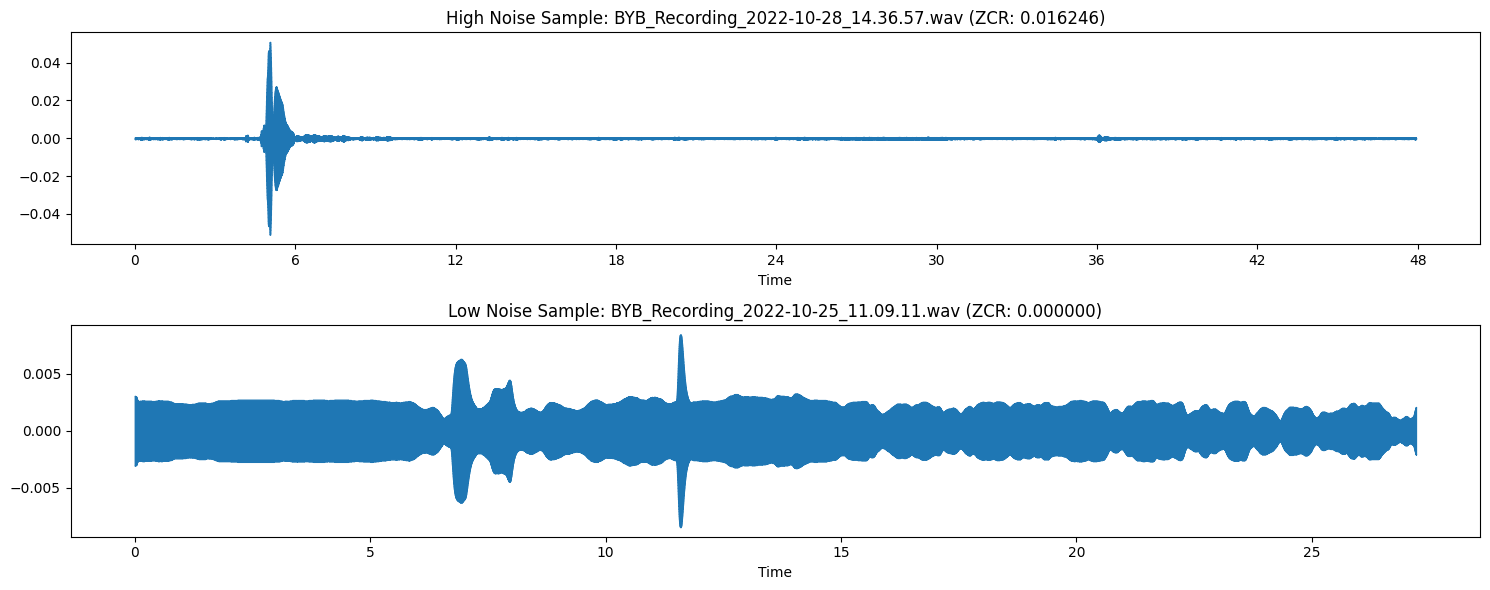

In [ ]:
import matplotlib.pyplot as plt
import librosa.display

# 1. Ambil contoh sinyal dengan ZCR tertinggi & terendah
high_noise = final_df.sort_values(by="zero_crossing_rate", ascending=False).iloc[0]
low_noise = final_df.sort_values(by="zero_crossing_rate", ascending=True).iloc[0]

# 2. Load sinyalnya
signal_high, sr_high = librosa.load(high_noise["wav_path"], sr=None)
signal_low, sr_low = librosa.load(low_noise["wav_path"], sr=None)

# 3. Plot
plt.figure(figsize=(15, 6))

plt.subplot(2, 1, 1)
librosa.display.waveshow(signal_high, sr=sr_high)
plt.title(f"High Noise Sample: {high_noise['wav_file']} (ZCR: {high_noise['zero_crossing_rate']:.6f})")

plt.subplot(2, 1, 2)
librosa.display.waveshow(signal_low, sr=sr_low)
plt.title(f"Low Noise Sample: {low_noise['wav_file']} (ZCR: {low_noise['zero_crossing_rate']:.6f})")

plt.tight_layout()
plt.show()

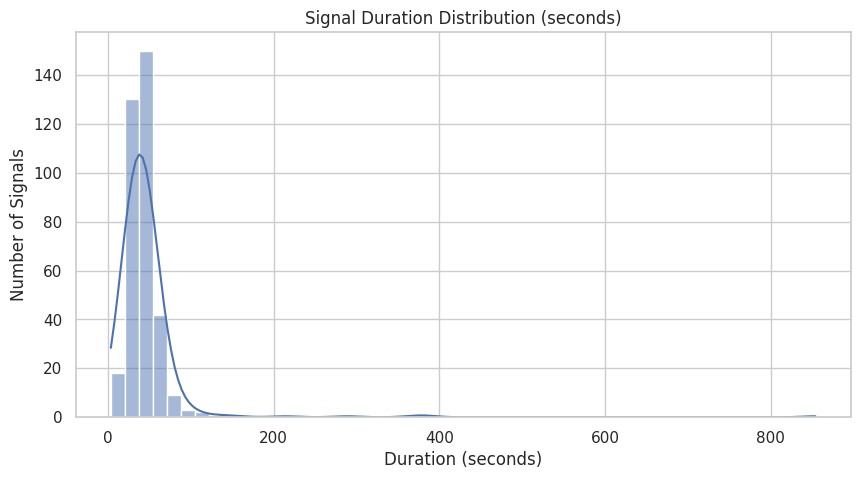

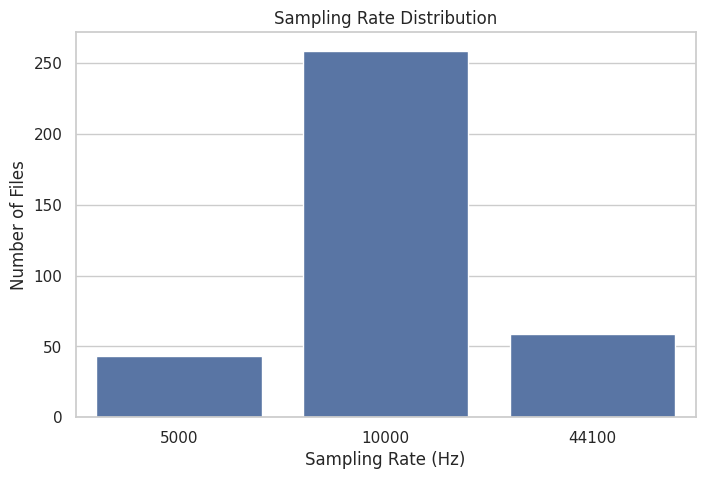

📌 Statistik Durasi Sinyal:
count    361.000000
mean      46.262213
std       54.774416
min        3.442400
25%       29.262400
50%       40.760100
75%       49.153600
max      853.748600
Name: duration_sec, dtype: float64

📌 Distribusi Sampling Rate:
sampling_rate
10000    259
44100     59
5000      43
Name: count, dtype: int64


In [ ]:
#signal duration and sampling


import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Plot distribusi durasi sinyal
plt.figure(figsize=(10, 5))
sns.histplot(final_df['duration_sec'].dropna(), bins=50, kde=True)
plt.title('Signal Duration Distribution (seconds)')
plt.xlabel('Duration (seconds)')
plt.ylabel('Number of Signals')
plt.show()

# Plot distribusi sampling rate
plt.figure(figsize=(8, 5))
sns.countplot(x='sampling_rate', data=final_df)
plt.title('Sampling Rate Distribution')
plt.xlabel('Sampling Rate (Hz)')
plt.ylabel('Number of Files')
plt.show()

# Statistik deskriptif durasi
duration_stats = final_df['duration_sec'].describe()
print("📌 Statistik Durasi Sinyal:")
print(duration_stats)

# Cek sampling rate unik
unique_sr = final_df['sampling_rate'].value_counts()
print("\n📌 Distribusi Sampling Rate:")
print(unique_sr)

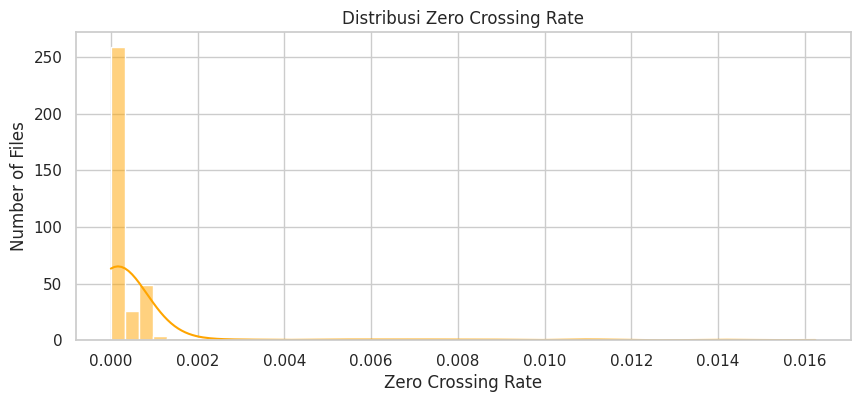

📊 Statistik ZCR:
count    361.000000
mean       0.000626
std        0.001982
min        0.000000
25%        0.000004
50%        0.000066
75%        0.000567
max        0.016246
Name: zero_crossing_rate, dtype: float64
🔍 IQR Threshold: Lower = -0.000840, Upper = 0.001411


In [ ]:
plt.figure(figsize=(10, 4))
sns.histplot(final_df['zero_crossing_rate'], bins=50, kde=True, color='orange')
plt.title("Distribusi Zero Crossing Rate")
plt.xlabel("Zero Crossing Rate")
plt.ylabel("Number of Files")
plt.grid(True)
plt.show()

# Statistik ZCR + IQR threshold
Q1 = final_df['zero_crossing_rate'].quantile(0.25)
Q3 = final_df['zero_crossing_rate'].quantile(0.75)
IQR = Q3 - Q1
lower_zcr = Q1 - 1.5 * IQR
upper_zcr = Q3 + 1.5 * IQR

print("📊 Statistik ZCR:")
print(final_df['zero_crossing_rate'].describe())
print(f"🔍 IQR Threshold: Lower = {lower_zcr:.6f}, Upper = {upper_zcr:.6f}")

In [ ]:
import pandas as pd

def parse_event_file(event_path):
    try:
        with open(event_path, 'r') as f:
            lines = f.readlines()
            lines = [line.strip() for line in lines if line.strip()]
            return len(lines), lines  # return jumlah event dan detail
    except Exception as e:
        print(f"Failed to read {event_path}: {e}")
        return 0, []

# Tambahkan kolom baru untuk event count dan detail
event_counts = []
event_details = []

for i, row in final_df.iterrows():
    if row['has_event_txt'] and row['event_path'] is not None:
        count, details = parse_event_file(row['event_path'])
    else:
        count, details = 0, []
    event_counts.append(count)
    event_details.append(details)

# Gabung ke dataframe utama
final_df['event_count'] = event_counts
final_df['event_lines'] = event_details

# Tampilkan ringkasan
print("🔎 Total file dengan event:", final_df['has_event_txt'].sum())
print("📊 Distribusi jumlah event per file:")
display(final_df['event_count'].value_counts().sort_index())

# Contoh file dengan event paling banyak
most_events = final_df.sort_values(by='event_count', ascending=False).head(5)
print("\n🔍 Contoh file dengan event terbanyak:")
display(most_events[['species_folder', 'wav_file', 'event_count', 'event_lines']])

🔎 Total file dengan event: 292
📊 Distribusi jumlah event per file:


event_count
0      69
3      77
4     203
5       2
6       7
8       1
9       1
11      1
Name: count, dtype: int64


🔍 Contoh file dengan event terbanyak:


species_folder                                           wav_file  \
76         Dionaea              BYB_Recording_2022-12-09_12.38.45.wav   
77         Dionaea              BYB_Recording_2022-12-09_13.03.55.wav   
292   Plectranthus  Santiago de Chile Plectranthus_1 Stimulus Fire...   
259         Mimosa  Munich Mimosa_1 Stimulus Tap BYB_Recording_202...   
337         Mentha              BYB_Recording_2022-10-30_00.46.25.wav   

     event_count                                        event_lines  
76            11  [# Marker IDs can be arbitrary strings., # Mar...  
77             9  [# Marker IDs can be arbitrary strings., # Mar...  
292            8  [# Marker IDs can be arbitrary strings., # Mar...  
259            6  [# Marker IDs can be arbitrary strings., # Mar...  
337            6  [# Marker IDs can be arbitrary strings., # Mar...

In [ ]:
import matplotlib.pyplot as plt

# Data distribusi jumlah event
event_distribution = {
    0: 69,
    1: 77,
    2: 203,
    3: 2,
    4: 7,
    6: 1,
    7: 1,
    9: 1
}

# Label dan data
labels = [f"{k} event" for k in event_distribution.keys()]
sizes = list(event_distribution.values())

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title("Distribusi Jumlah Event Marker per File")
plt.axis('equal')
plt.show()

100%|██████████| 292/292 [00:00<00:00, 340.16it/s]


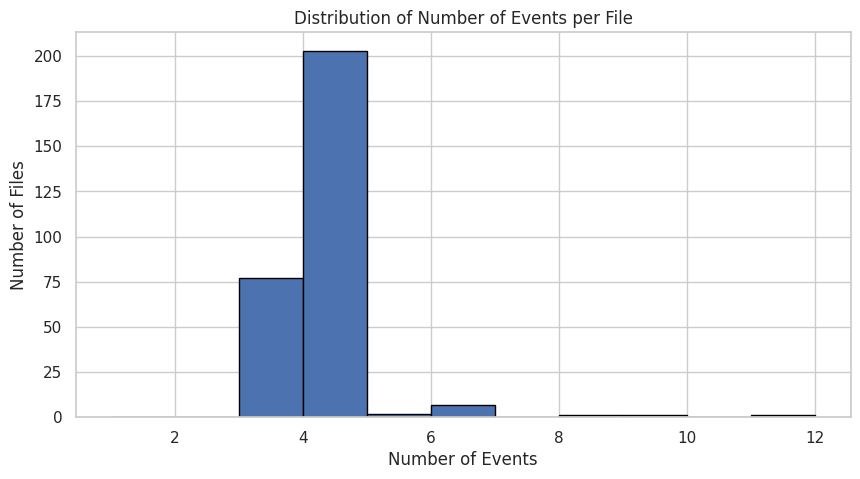

In [ ]:
import matplotlib.pyplot as plt

# Filter file yang punya event
event_files = final_df[final_df['has_event_txt'] == True]

# Hitung jumlah baris per file -events.txt
event_counts = []
for path in tqdm(event_files['event_path']):
    try:
        with open(path, 'r') as f:
            lines = f.readlines()
            event_counts.append(len(lines))
    except Exception as e:
        print(f"Error reading {path}: {e}")
        event_counts.append(0)

# Tambahkan ke dataframe
event_files = event_files.copy()
event_files['num_events'] = event_counts

# Plot distribusi
plt.figure(figsize=(10, 5))
plt.hist(event_counts, bins=range(1, max(event_counts)+2), edgecolor='black')
plt.title("Distribution of Number of Events per File")
plt.xlabel("Number of Events")
plt.ylabel("Number of Files")
plt.grid(True)
plt.show()

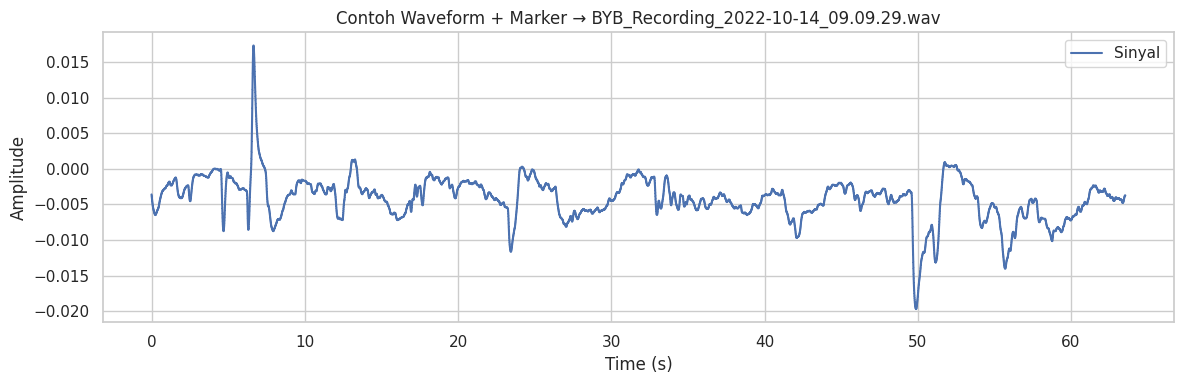

In [ ]:
import librosa
import librosa.display
import numpy as np

# Pilih salah satu file yang punya marker valid
example_row = final_df[(final_df['event_count'] > 0)].iloc[0]
wav_path = example_row['wav_path']
event_lines = example_row['event_lines']

# Load sinyal
signal, sr = librosa.load(wav_path, sr=None)
duration = len(signal) / sr
time = np.linspace(0, duration, len(signal))

# Ambil posisi marker (dalam detik)
marker_times = []
for line in event_lines:
    try:
        t = float(line.split()[0])
        marker_times.append(t)
    except:
        continue

# Plot
plt.figure(figsize=(12, 4))
plt.plot(time, signal, label='Waveform')
for mt in marker_times:
    plt.axvline(x=mt, color='red', linestyle='--', alpha=0.7)
plt.title(f"Contoh Waveform + Marker → {example_row['wav_file']}")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend(["Sinyal", "Marker"])
plt.tight_layout()
plt.show()

In [ ]:
# Lihat isi event_lines dan periksa hasil parsing
print("🔍 Event Lines:")
print(example_row['event_lines'])

# Cek parsing ke float berhasil atau tidak
for line in example_row['event_lines']:
    try:
        print(float(line.split()[0]))
    except:
        print(f"Gagal parsing: {line}")

🔍 Event Lines:
['# Marker IDs can be arbitrary strings.', '# Marker ID,\tTime (in s)', '1,\t12.5090']
Gagal parsing: # Marker IDs can be arbitrary strings.
Gagal parsing: # Marker ID,	Time (in s)
Gagal parsing: 1,	12.5090


In [ ]:
def parse_clean_event_file(event_path):
    try:
        with open(event_path, 'r') as f:
            lines = f.readlines()
            times = []
            for line in lines:
                line = line.strip()
                if line.startswith('#') or not line:
                    continue
                parts = line.split(',')
                if len(parts) == 2:
                    try:
                        times.append(float(parts[1]))
                    except ValueError:
                        continue
        return len(times), times
    except Exception as e:
        print(f"❌ Error reading {event_path}: {e}")
        return 0, []

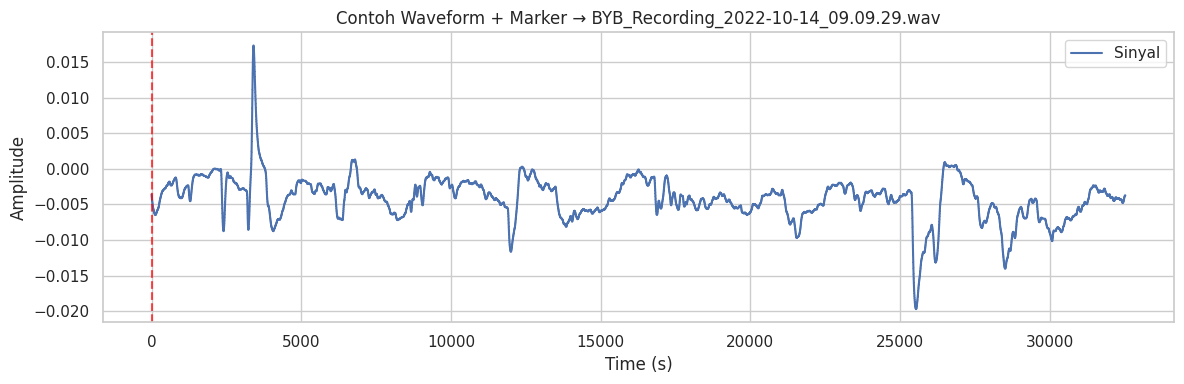

In [ ]:
# Contoh ambil satu file event
sample_row = final_df[final_df['has_event_txt']].iloc[0]
wav_path = sample_row['wav_path']
event_path = sample_row['event_path']

# Gunakan fungsi parsing bersih
_, marker_times = parse_clean_event_file(event_path)

# Plot waveform dan marker overlay
import librosa
import matplotlib.pyplot as plt

signal, sr = librosa.load(wav_path, sr=None)
time = librosa.times_like(signal, sr=sr)

plt.figure(figsize=(12, 4))
plt.plot(time, signal, label='Sinyal')
for marker in marker_times:
    plt.axvline(x=marker, color='red', linestyle='--', alpha=0.7)
plt.title(f"Contoh Waveform + Marker → {os.path.basename(wav_path)}")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.tight_layout()
plt.show()

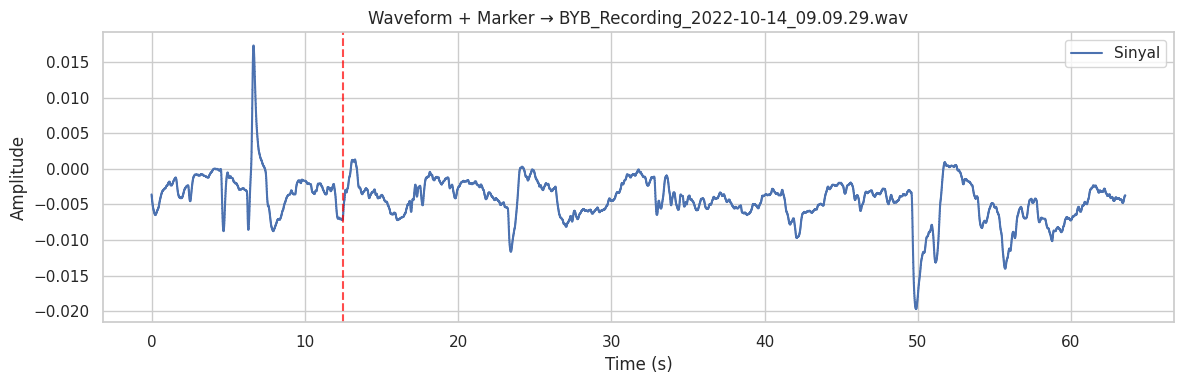

In [ ]:
import numpy as np

time = np.arange(len(signal)) / sr

plt.figure(figsize=(12, 4))
plt.plot(time, signal, label='Sinyal')
for marker in marker_times:
    plt.axvline(x=marker, color='red', linestyle='--', alpha=0.7)
plt.title(f"Waveform + Marker → {os.path.basename(wav_path)}")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.tight_layout()
plt.show()

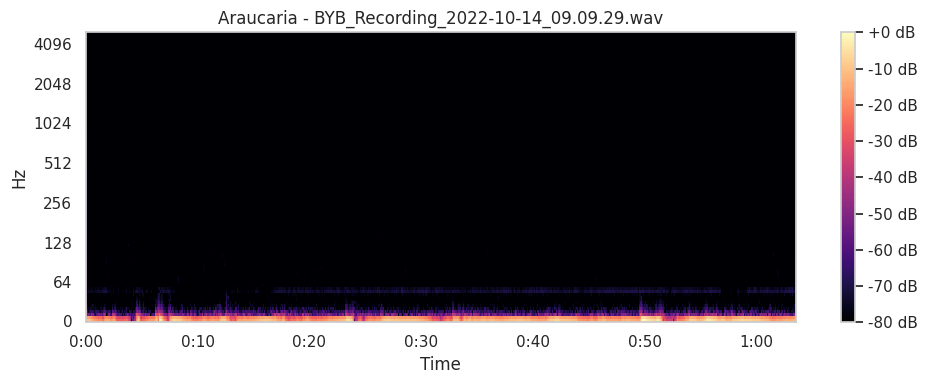

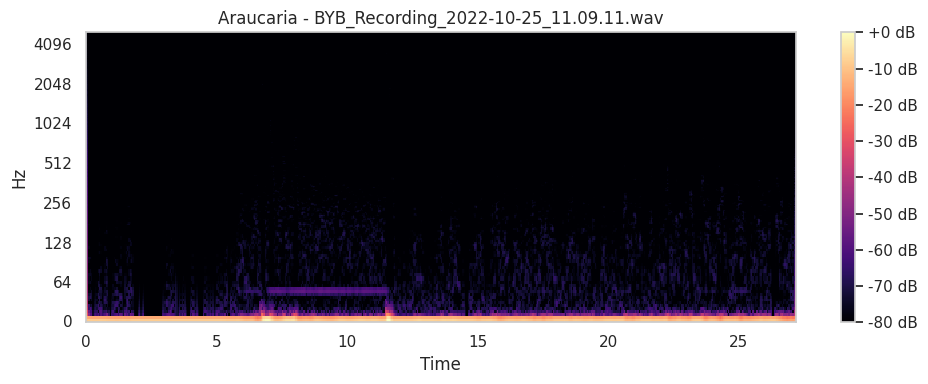

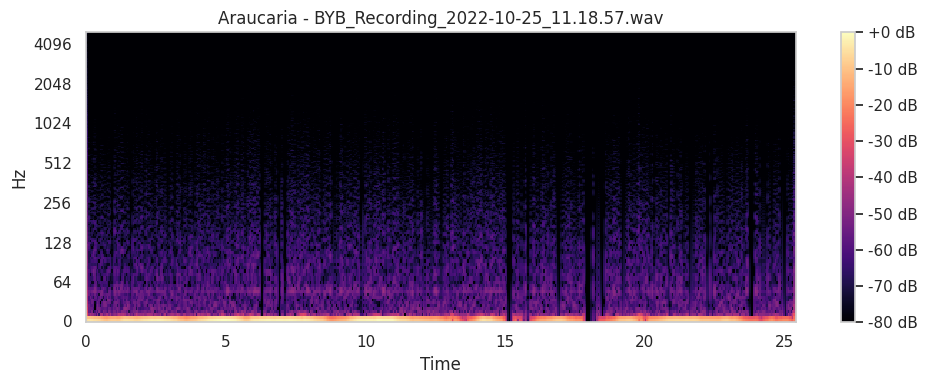

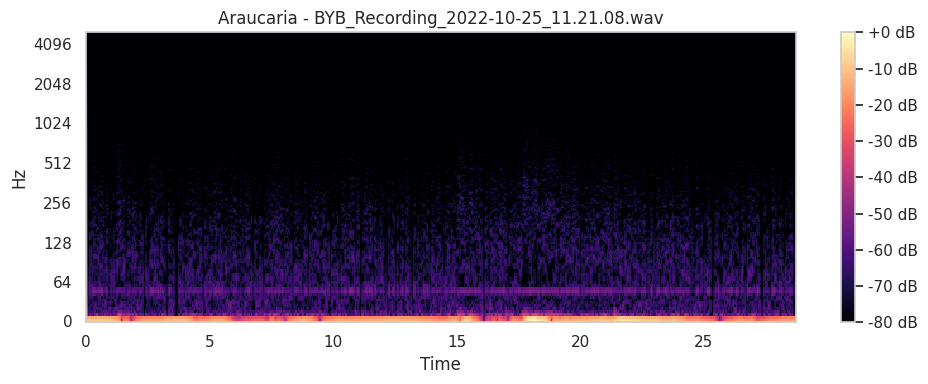

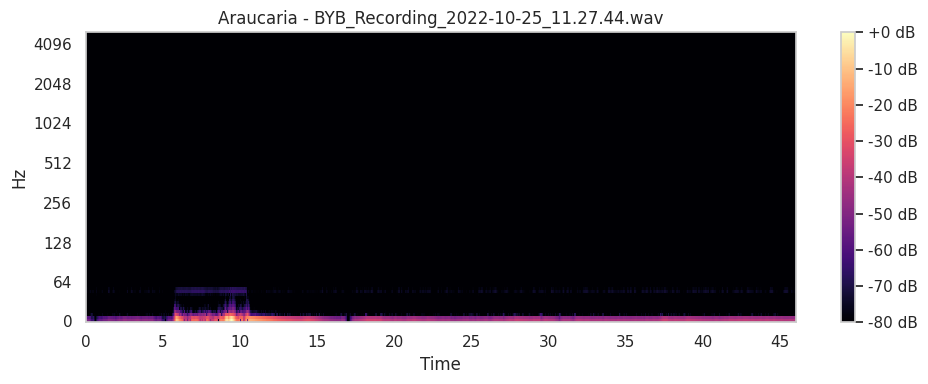

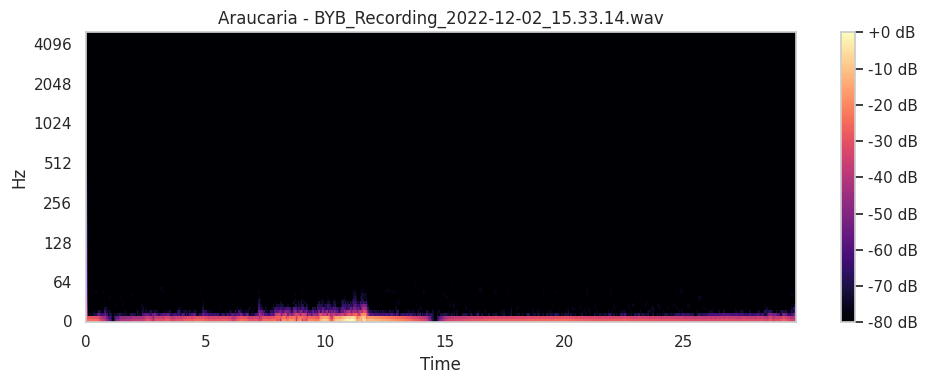

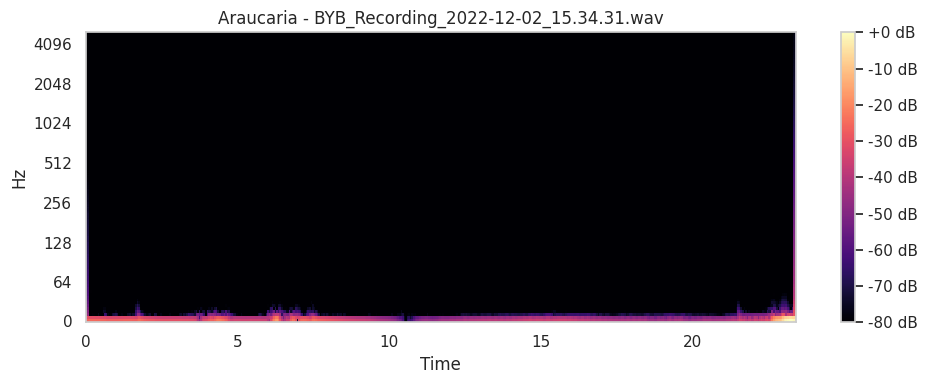

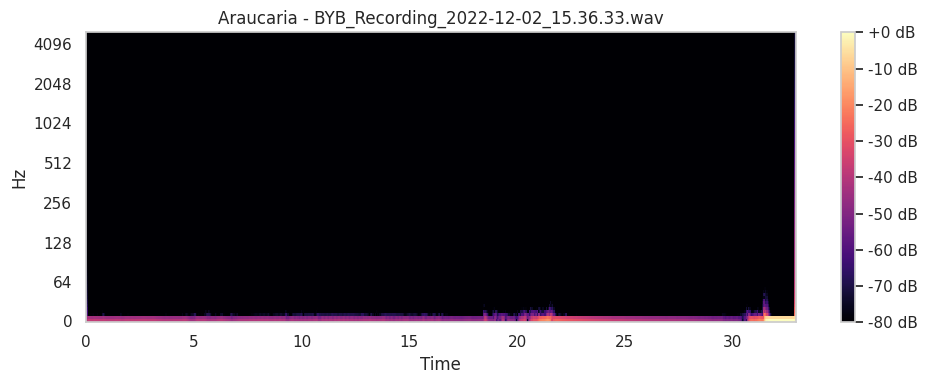

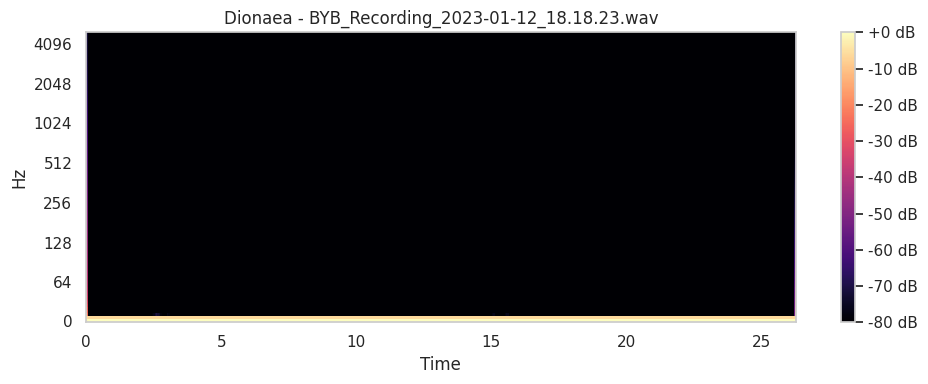

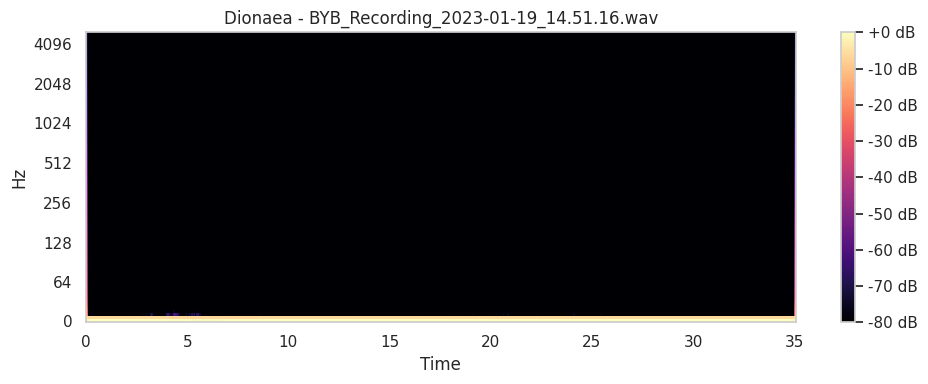

KeyboardInterrupt: 

In [ ]:
import librosa.display
import matplotlib.pyplot as plt

def plot_spectrogram(wav_path, title=None):
    signal, sr = librosa.load(wav_path, sr=None)
    D = librosa.stft(signal)
    S_db = librosa.amplitude_to_db(abs(D), ref=np.max)

    plt.figure(figsize=(10, 4))
    librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log', cmap='magma')
    plt.colorbar(format='%+2.0f dB')
    plt.title(title or 'Spectrogram')
    plt.tight_layout()
    plt.show()

# Contoh: Ambil 3 file pertama dari dataframe final_df
for i in range(len(final_df)):
    path = final_df.iloc[i]['wav_path']
    title = f"{final_df.iloc[i]['species_folder']} - {final_df.iloc[i]['wav_file']}"
    plot_spectrogram(path, title=title)

In [ ]:
import numpy as np
import librosa

def extract_frequency_features(file_path):
    try:
        signal, sr = librosa.load(file_path, sr=None)
        spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=signal, sr=sr))
        spectral_bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=signal, sr=sr))
        spectral_rolloff = np.mean(librosa.feature.spectral_rolloff(y=signal, sr=sr, roll_percent=0.85))

        # Dominant frequency
        stft = np.abs(librosa.stft(signal))
        freqs = librosa.fft_frequencies(sr=sr)
        dom_freq = freqs[np.argmax(np.sum(stft, axis=1))]

        return {
            "spectral_centroid": spectral_centroid,
            "spectral_bandwidth": spectral_bandwidth,
            "spectral_rolloff": spectral_rolloff,
            "dominant_frequency": dom_freq
        }
    except Exception as e:
        print(f"Error extracting freq features from {file_path}: {e}")
        return {
            "spectral_centroid": None,
            "spectral_bandwidth": None,
            "spectral_rolloff": None,
            "dominant_frequency": None
        }

freq_feature_list = []
for i, row in tqdm(final_df.iterrows(), total=len(final_df)):
    freq_features = extract_frequency_features(row['wav_path'])
    freq_feature_list.append(freq_features)

freq_df = pd.DataFrame(freq_feature_list)
final_df = pd.concat([final_df, freq_df], axis=1)

# Tampilkan hasilnya
from IPython.display import display
display(final_df)

100%|██████████| 361/361 [01:19<00:00,  4.56it/s]


species_folder                                          subfolder  \
0         Araucaria                                          Araucaria   
1         Araucaria                                          Araucaria   
2         Araucaria                                          Araucaria   
3         Araucaria                                          Araucaria   
4         Araucaria                                          Araucaria   
5         Araucaria                                          Araucaria   
6         Araucaria                                          Araucaria   
7         Araucaria                                          Araucaria   
8           Dionaea                       Dionaea/Venus - Danae/trap 2   
9           Dionaea                       Dionaea/Venus - Danae/trap 2   
10          Dionaea                       Dionaea/Venus - Danae/trap 4   
11          Dionaea                       Dionaea/Venus - Danae/trap 5   
12          Dionaea                       Dionaea/Venus - Danae/trap 1   
13          Dionaea                       Dionaea/Venus - Danae/trap 1   
14          Dionaea                       Dionaea/Venus - Danae/trap 1   
15          Dionaea                       Dionaea/Venus - Danae/trap 1   
16          Dionaea                       Dionaea/Venus - Danae/trap 3   
17          Dionaea                          Dionaea/Venus - ET/Trap 1   
18          Dionaea                Dionaea/Venus - ET/Trap 4 too young   
19          Dionaea                         Dionaea/Venus - ET/Trap 10   
20          Dionaea                         Dionaea/Venus - ET/Trap 10   
21          Dionaea                         Dionaea/Venus - ET/Trap 10   
22          Dionaea                         Dionaea/Venus - ET/Trap 10   
23          Dionaea                         Dionaea/Venus - ET/Trap 10   
24          Dionaea                Dionaea/Venus - ET/Trap 6 one timer   
25          Dionaea                Dionaea/Venus - ET/Trap 6 one timer   
26          Dionaea                  Dionaea/Venus - ET/Trap 3 closing   
27          Dionaea                  Dionaea/Venus - ET/Trap 3 closing   
28          Dionaea                         Dionaea/Venus - ET/Trap 11   
29          Dionaea                         Dionaea/Venus - ET/Trap 11   
30          Dionaea                         Dionaea/Venus - ET/Trap 11   
31          Dionaea                         Dionaea/Venus - ET/Trap 11   
32          Dionaea                         Dionaea/Venus - ET/Trap 11   
33          Dionaea                         Dionaea/Venus - ET/Trap 11   
34          Dionaea                         Dionaea/Venus - ET/Trap 11   
35          Dionaea                         Dionaea/Venus - ET/Trap 11   
36          Dionaea                Dionaea/Venus - ET/Trap 5 too young   
37          Dionaea                  Dionaea/Venus - ET/Trap 2 closing   
38          Dionaea                  Dionaea/Venus - ET/Trap 2 closing   
39          Dionaea  Dionaea/Venus - ET/Trap 7 long term/Contra middle   
40          Dionaea  Dionaea/Venus - ET/Trap 7 long term/Contra middle   
41          Dionaea     Dionaea/Venus - ET/Trap 7 long term/Ipsi right   
42          Dionaea     Dionaea/Venus - ET/Trap 7 long term/Ipsi right   
43          Dionaea     Dionaea/Venus - ET/Trap 7 long term/Ipsi right   
44          Dionaea     Dionaea/Venus - ET/Trap 7 long term/Ipsi right   
45          Dionaea     Dionaea/Venus - ET/Trap 7 long term/Ipsi right   
46          Dionaea     Dionaea/Venus - ET/Trap 7 long term/Ipsi right   
47          Dionaea   Dionaea/Venus - ET/Trap 7 long term/Contra right   
48          Dionaea      Dionaea/Venus - ET/Trap 7 long term/Ipsi left   
49          Dionaea      Dionaea/Venus - ET/Trap 7 long term/Ipsi left   
50          Dionaea      Dionaea/Venus - ET/Trap 7 long term/Ipsi left   
51          Dionaea      Dionaea/Venus - ET/Trap 7 long term/Ipsi left   
52          Dionaea      Dionaea/Venus - ET/Trap 7 long term/Ipsi left   
53       

In [ ]:
def summarize_max_min(df, columns):
    summary = []
    for col in columns:
        if df[col].isnull().all():
            continue
        max_val = df[col].max()
        min_val = df[col].min()
        max_row = df[df[col] == max_val].iloc[0]
        min_row = df[df[col] == min_val].iloc[0]
        summary.append({
            "feature": col,
            "max_value": max_val,
            "max_file": max_row['wav_file'],
            "max_species": max_row['species_folder'],
            "min_value": min_val,
            "min_file": min_row['wav_file'],
            "min_species": min_row['species_folder'],
        })
    return pd.DataFrame(summary)

In [ ]:
freq_cols = ["spectral_centroid", "spectral_bandwidth", "spectral_rolloff", "dominant_frequency"]
summary_df = summarize_max_min(final_df, freq_cols)

# Tampilkan ringkasan
from IPython.display import display
display(summary_df)

feature    max_value                               max_file  \
0   spectral_centroid  2303.249551  BYB_Recording_2022-11-03_22_02_49.wav   
1  spectral_bandwidth  4554.860825  BYB_Recording_2022-11-03_22_02_49.wav   
2    spectral_rolloff  5032.669557  BYB_Recording_2022-11-03_22_02_49.wav   
3  dominant_frequency     2.441406  BYB_Recording_2022-10-28_14.30.39.wav   

  max_species  min_value                               min_file min_species  
0     Dionaea   3.865812  BYB_Recording_2023-07-21_15.27.50.wav      Mentha  
1     Dionaea  30.648923  BYB_Recording_2023-01-12_18.18.23.wav     Dionaea  
2     Dionaea   4.087706  BYB_Recording_2022-10-30_00.46.25.wav      Mentha  
3      Mimosa   0.000000  BYB_Recording_2022-10-14_09.09.29.wav   Araucaria

In [ ]:
print(final_df.columns.tolist())

['species_folder', 'subfolder', 'wav_file', 'has_event_txt', 'wav_path', 'event_path', 'duration_sec', 'sampling_rate', 'min_amplitude', 'max_amplitude', 'mean_amplitude', 'std_amplitude', 'skewness', 'kurtosis', 'zero_crossing_rate', 'event_count', 'event_lines', 'spectral_centroid', 'spectral_bandwidth', 'spectral_rolloff', 'dominant_frequency']


In [ ]:
import numpy as np

# Step 1: Buang duplikat berdasarkan path (wajib sebelum flagging ganda)
final_df = final_df.drop_duplicates(subset='wav_path').reset_index(drop=True)

# Step 2: Flag event marker outlier (<2 atau >6)
final_df['event_outlier'] = final_df['event_count'].apply(lambda x: x < 2 or x > 6)

# Step 3: Flag amplitude outlier (jika terlalu kecil/tinggi)
final_df['amplitude_outlier'] = final_df.apply(
    lambda row: (row['min_amplitude'] < -0.01 or row['max_amplitude'] > 0.01),
    axis=1
)

# Step 4: Flag short duration (< 5 detik)
final_df['short_duration'] = final_df['duration_sec'] < 5

# Step 5: Flag missing event file
final_df['missing_event_txt'] = final_df['has_event_txt'] == False

# Step 6: Flag extreme ZCR (pakai IQR method)
q1 = final_df['zero_crossing_rate'].quantile(0.25)
q3 = final_df['zero_crossing_rate'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
final_df['extreme_zcr'] = ~final_df['zero_crossing_rate'].between(lower_bound, upper_bound)

# Step 7: Summary jumlah flag
print("🔢 Distribusi Event Outlier:")
print(final_df['event_outlier'].value_counts())
print("\n🔢 Distribusi Amplitude Outlier:")
print(final_df['amplitude_outlier'].value_counts())
print("\n📉 Distribusi Short Duration:")
print(final_df['short_duration'].value_counts())
print("\n📁 Distribusi Missing Event File:")
print(final_df['missing_event_txt'].value_counts())
print("\n📈 Distribusi Extreme ZCR:")
print(final_df['extreme_zcr'].value_counts())

🔢 Distribusi Event Outlier:
event_outlier
False    289
True      72
Name: count, dtype: int64

🔢 Distribusi Amplitude Outlier:
amplitude_outlier
True     242
False    119
Name: count, dtype: int64

📉 Distribusi Short Duration:
short_duration
False    360
True       1
Name: count, dtype: int64

📁 Distribusi Missing Event File:
missing_event_txt
False    292
True      69
Name: count, dtype: int64

📈 Distribusi Extreme ZCR:
extreme_zcr
False    339
True      22
Name: count, dtype: int64


In [ ]:
# Statistik deskriptif
print("📊 Statistik Min Amplitude:")
print(final_df['min_amplitude'].describe())
print("\n📊 Statistik Max Amplitude:")
print(final_df['max_amplitude'].describe())

# Hitung IQR untuk min & max amplitude
q1_min = final_df['min_amplitude'].quantile(0.25)
q3_min = final_df['min_amplitude'].quantile(0.75)
iqr_min = q3_min - q1_min

q1_max = final_df['max_amplitude'].quantile(0.25)
q3_max = final_df['max_amplitude'].quantile(0.75)
iqr_max = q3_max - q1_max

print(f"\n📏 Min Amplitude IQR range: {q1_min - 1.5 * iqr_min:.5f} to {q3_min + 1.5 * iqr_min:.5f}")
print(f"📏 Max Amplitude IQR range: {q1_max - 1.5 * iqr_max:.5f} to {q3_max + 1.5 * iqr_max:.5f}")

📊 Statistik Min Amplitude:
count    361.000000
mean      -0.032416
std        0.098360
min       -0.463043
25%       -0.038712
50%       -0.010895
75%       -0.002289
max        0.287994
Name: min_amplitude, dtype: float64

📊 Statistik Max Amplitude:
count    361.000000
mean       0.050471
std        0.102358
min       -0.198730
25%        0.002411
50%        0.014160
75%        0.064362
max        0.461334
Name: max_amplitude, dtype: float64

📏 Min Amplitude IQR range: -0.09335 to 0.05235
📏 Max Amplitude IQR range: -0.09052 to 0.15729


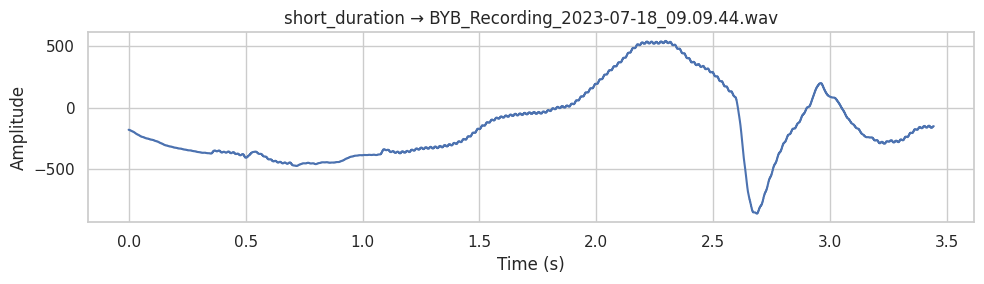

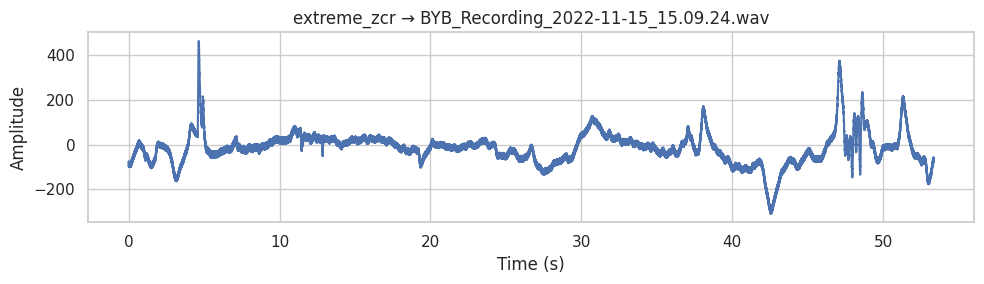

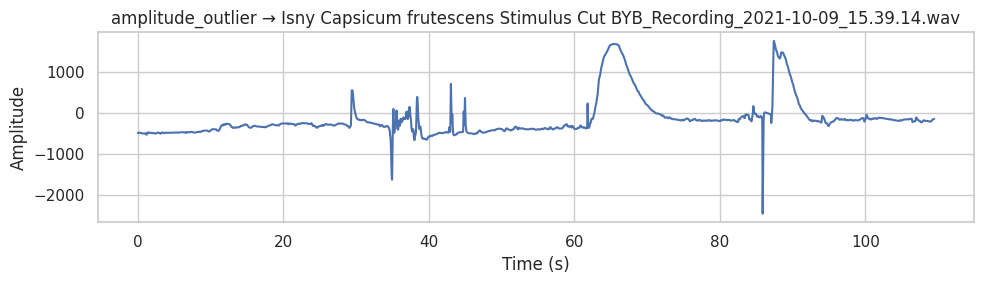

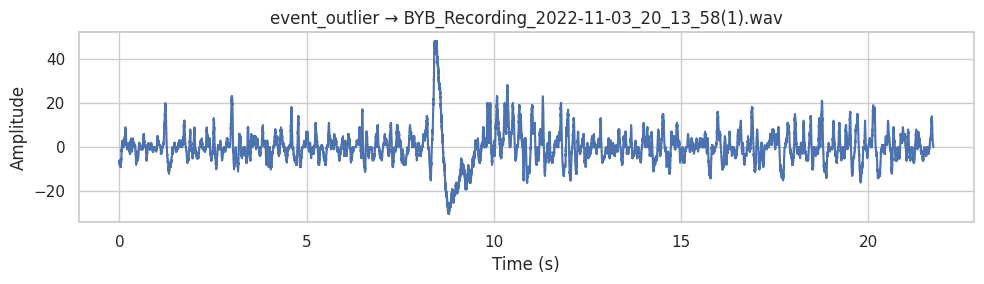

In [ ]:
# Function to plot waveform
def plot_waveform(wav_path, title):
    sr, signal = wavfile.read(wav_path)
    if signal.ndim > 1:
        signal = signal[:, 0]  # ambil 1 channel jika stereo
    time = np.arange(0, len(signal)) / sr
    plt.figure(figsize=(10, 3))
    plt.plot(time, signal)
    plt.title(title)
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.tight_layout()
    plt.show()

# Ambil contoh tiap flag
flags = ["short_duration", "extreme_zcr", "amplitude_outlier", "event_outlier"]
for flag in flags:
    sample = final_df[final_df[flag] == True].sample(1, random_state=42)
    path = sample.iloc[0]["wav_path"]
    title = f"{flag} → {sample.iloc[0]['wav_file']}"
    plot_waveform(path, title)

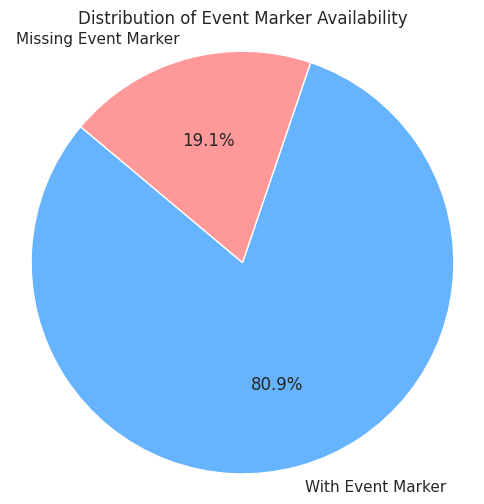

In [ ]:
labels = ['With Event Marker', 'Missing Event Marker']
sizes = final_df['missing_event_txt'].value_counts().sort_index()
colors = ['#66b3ff', '#ff9999']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title("Distribution of Event Marker Availability")
plt.axis('equal')
plt.show()

In [ ]:

# Daftar kolom flag yang mau dicek
flag_columns = [
    'event_outlier',
    'amplitude_outlier',
    'short_duration',
    'missing_event_txt',
    'extreme_zcr'
]

# Buat ringkasan count True dan False
flag_summary = pd.DataFrame({
    'Flag': flag_columns,
    'Jumlah True': [final_df[col].sum() for col in flag_columns],
    'Jumlah False': [len(final_df) - final_df[col].sum() for col in flag_columns]
})

# Tampilkan
flag_summary

Flag  Jumlah True  Jumlah False
0      event_outlier           72           289
1  amplitude_outlier          242           119
2     short_duration            1           360
3  missing_event_txt           69           292
4        extreme_zcr           22           339

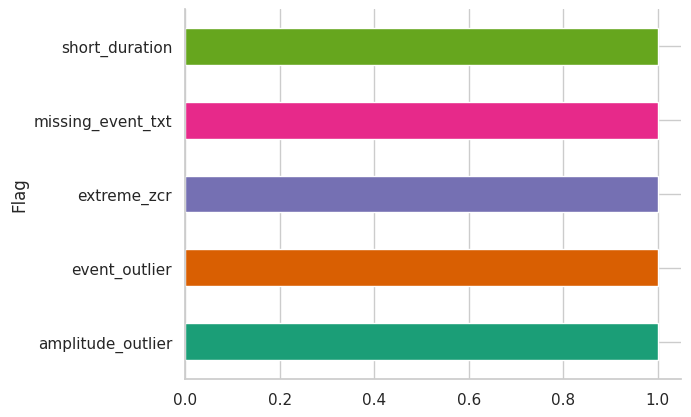

In [ ]:
# @title Flag

from matplotlib import pyplot as plt
import seaborn as sns
flag_summary.groupby('Flag').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

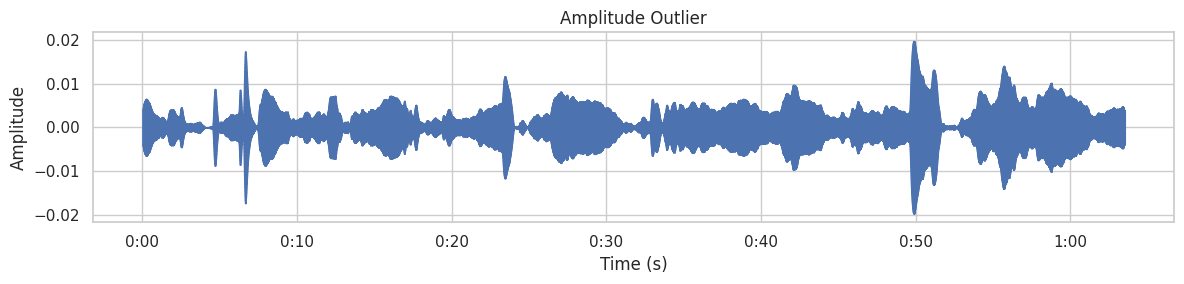

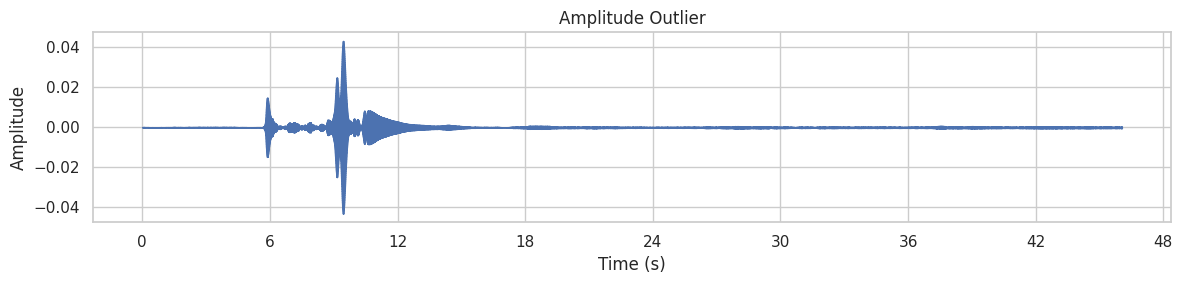

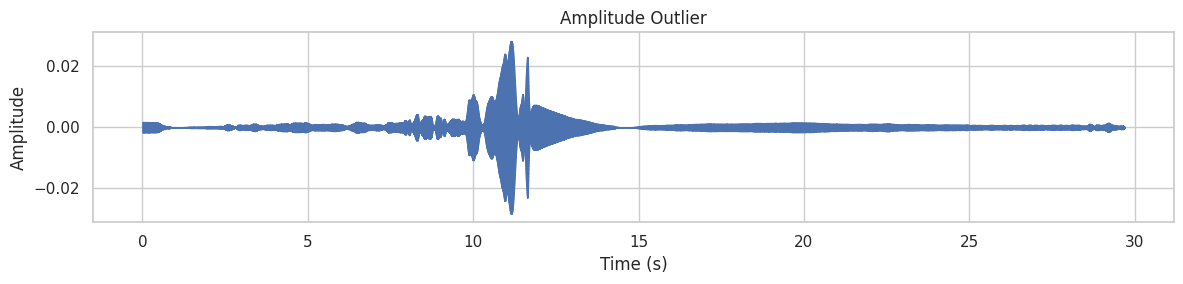

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

def plot_waveform(wav_path, title=''):
    signal, sr = librosa.load(wav_path, sr=None)
    plt.figure(figsize=(12, 3))
    librosa.display.waveshow(signal, sr=sr)
    plt.title(title)
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.tight_layout()
    plt.show()

# Plot 3 sinyal yang terindikasi amplitude outlier
for path in final_df[final_df['amplitude_outlier'] == True]['wav_path'].head(3):
    plot_waveform(path, title="Amplitude Outlier")

In [ ]:
# Cek jumlah file unik berdasarkan 'wav_path'
unique_paths = final_df['wav_path'].nunique()
total_rows = len(final_df)

print(f"📂 Jumlah total baris: {total_rows}")
print(f"🔎 Jumlah path unik  : {unique_paths}")

if total_rows == unique_paths:
    print("✅ Tidak ada duplikat berdasarkan 'wav_path'.")
else:
    print(f"⚠️ Terdapat {total_rows - unique_paths} duplikat berdasarkan 'wav_path'.")

📂 Jumlah total baris: 361
🔎 Jumlah path unik  : 361
✅ Tidak ada duplikat berdasarkan 'wav_path'.


In [ ]:
final_df.describe()

duration_sec  sampling_rate  min_amplitude  max_amplitude  \
count    361.000000     361.000000     361.000000     361.000000   
mean      46.262213   14977.562327      -0.032416       0.050471   
std       54.774416   12988.949176       0.098360       0.102358   
min        3.442400    5000.000000      -0.463043      -0.198730   
25%       29.262400   10000.000000      -0.038712       0.002411   
50%       40.760100   10000.000000      -0.010895       0.014160   
75%       49.153600   10000.000000      -0.002289       0.064362   
max      853.748600   44100.000000       0.287994       0.461334   

       mean_amplitude  std_amplitude    skewness    kurtosis  \
count    3.610000e+02     361.000000  361.000000  361.000000   
mean     4.952392e-03       0.010615    0.724702   23.777349   
std      6.163980e-02       0.023918    3.249054   46.142101   
min     -2.046899e-01       0.000130  -18.260998   -1.514864   
25%     -3.920267e-03       0.000812   -0.424050    1.556658   
50%      4.974239e-07       0.002826    0.444494    7.795233   
75%      2.693220e-03       0.006987    1.890291   25.826265   
max      2.892911e-01       0.165557   17.252092  468.021790   

       zero_crossing_rate  event_count  spectral_centroid  spectral_bandwidth  \
count          361.000000   361.000000         361.000000          361.000000   
mean             0.000626     3.110803         371.628988          929.193621   
std              0.001982     1.679590         682.135248         1409.719633   
min              0.000000     0.000000           3.865812           30.648923   
25%              0.000004     3.000000          15.204189          151.860813   
50%              0.000066     4.000000          70.948947          378.621295   
75%              0.000567     4.000000         198.363728          634.202473   
max              0.016246    11.000000        2303.249551         4554.860825   

       spectral_rolloff  dominant_frequency  
count        361.000000          361.000000  
mean         687.880310            0.047340  
std         1422.200683            0.337121  
min            4.087706            0.000000  
25%            9.488192            0.000000  
50%           28.458873            0.000000  
75%          252.911714            0.000000  
max         5032.669557            2.441406

In [ ]:
# Tampilkan statistik hanya untuk fitur numerik yang relevan
numeric_cols = final_df.select_dtypes(include=['float64', 'int64']).columns

# Bisa juga disesuaikan untuk hanya fitur tertentu
selected_cols = [
    "duration_sec", "sampling_rate", "min_amplitude", "max_amplitude",
    "mean_amplitude", "std_amplitude", "skewness", "kurtosis",
    "zero_crossing_rate", "spectral_centroid", "spectral_bandwidth",
    "spectral_rolloff", "dominant_frequency"
]

# Intersect antara yang dipilih dan yang memang ada di dataframe
cols_to_describe = [col for col in selected_cols if col in final_df.columns]

# Tampilkan deskriptif statistik
final_df[cols_to_describe].describe().transpose()

count          mean           std          min  \
duration_sec        361.0     46.262213     54.774416     3.442400   
sampling_rate       361.0  14977.562327  12988.949176  5000.000000   
min_amplitude       361.0     -0.032416      0.098360    -0.463043   
max_amplitude       361.0      0.050471      0.102358    -0.198730   
mean_amplitude      361.0      0.004952      0.061640    -0.204690   
std_amplitude       361.0      0.010615      0.023918     0.000130   
skewness            361.0      0.724702      3.249054   -18.260998   
kurtosis            361.0     23.777349     46.142101    -1.514864   
zero_crossing_rate  361.0      0.000626      0.001982     0.000000   
spectral_centroid   361.0    371.628988    682.135248     3.865812   
spectral_bandwidth  361.0    929.193621   1409.719633    30.648923   
spectral_rolloff    361.0    687.880310   1422.200683     4.087706   
dominant_frequency  361.0      0.047340      0.337121     0.000000   

                             25%           50%           75%           max  
duration_sec           29.262400  4.076010e+01     49.153600    853.748600  
sampling_rate       10000.000000  1.000000e+04  10000.000000  44100.000000  
min_amplitude          -0.038712 -1.089478e-02     -0.002289      0.287994  
max_amplitude           0.002411  1.416016e-02      0.064362      0.461334  
mean_amplitude         -0.003920  4.974239e-07      0.002693      0.289291  
std_amplitude           0.000812  2.826259e-03      0.006987      0.165557  
skewness               -0.424050  4.444944e-01      1.890291     17.252092  
kurtosis                1.556658  7.795233e+00     25.826265    468.021790  
zero_crossing_rate      0.000004  6.556427e-05      0.000567      0.016246  
spectral_centroid      15.204189  7.094895e+01    198.363728   2303.249551  
spectral_bandwidth    151.860813  3.786213e+02    634.202473   4554.860825  
spectral_rolloff        9.488192  2.845887e+01    252.911714   5032.669557  
dominant_frequency      0.000000  0.000000e+00      0.000000      2.441406

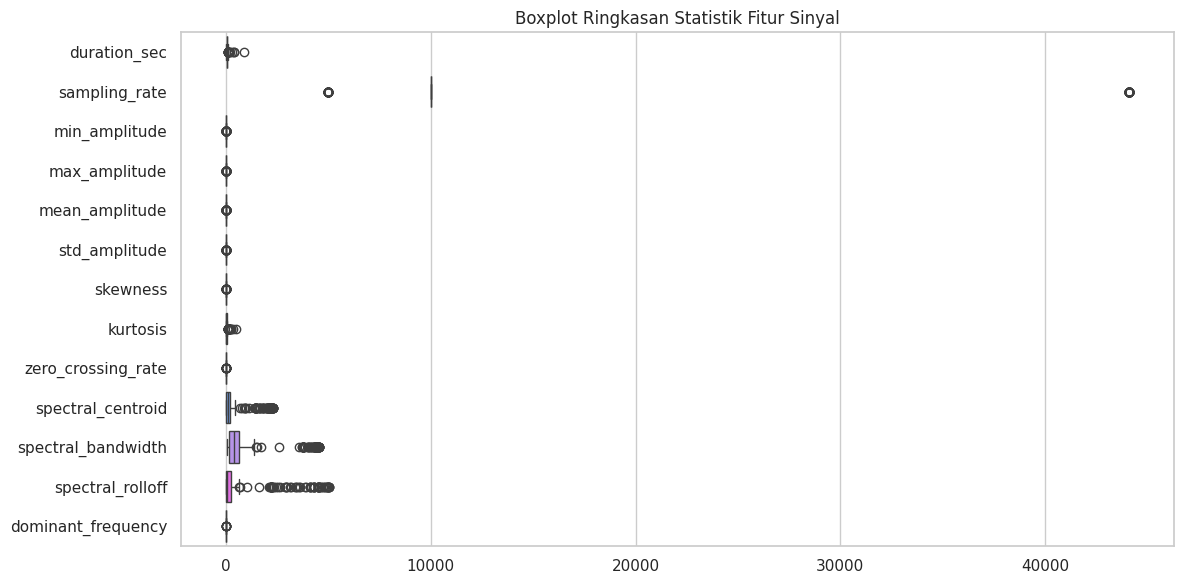

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(data=final_df[cols_to_describe], orient='h')
plt.title("Boxplot Ringkasan Statistik Fitur Sinyal")
plt.tight_layout()
plt.show()

In [ ]:
final_df.to_csv("final_df_cleaned.csv", index=False)

In [ ]:
print(final_df.columns.tolist())

['species_folder', 'subfolder', 'wav_file', 'has_event_txt', 'wav_path', 'event_path', 'duration_sec', 'sampling_rate', 'min_amplitude', 'max_amplitude', 'mean_amplitude', 'std_amplitude', 'skewness', 'kurtosis', 'zero_crossing_rate', 'event_count', 'event_lines', 'spectral_centroid', 'spectral_bandwidth', 'spectral_rolloff', 'dominant_frequency', 'event_outlier', 'amplitude_outlier', 'short_duration', 'missing_event_txt', 'extreme_zcr']


#### Data Preprocessing

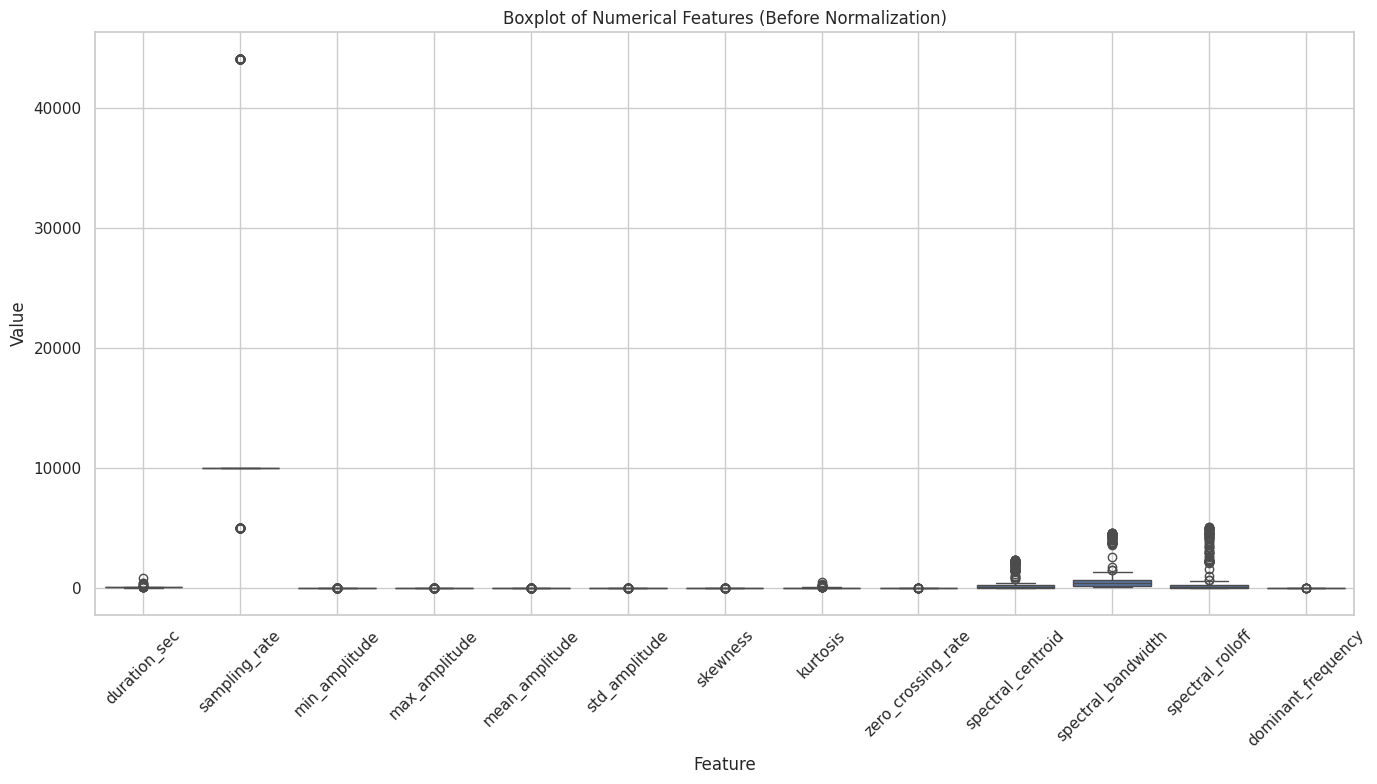

In [ ]:
# Select only the relevant numeric features (before normalization)
numeric_cols = [
    "duration_sec", "sampling_rate", "min_amplitude", "max_amplitude",
    "mean_amplitude", "std_amplitude", "skewness", "kurtosis",
    "zero_crossing_rate", "spectral_centroid", "spectral_bandwidth",
    "spectral_rolloff", "dominant_frequency"
]

# Create boxplots for each numeric feature
plt.figure(figsize=(14, 8))
df_melted = final_df[numeric_cols].melt(var_name='Feature', value_name='Value')
sns.boxplot(data=df_melted, x='Feature', y='Value')
plt.xticks(rotation=45)
plt.title("Boxplot of Numerical Features (Before Normalization)")
plt.tight_layout()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

# Daftar fitur yang akan dinormalisasi
features_to_normalize = [
    "min_amplitude", "max_amplitude", "mean_amplitude", "std_amplitude",
    "skewness", "kurtosis", "spectral_centroid", "spectral_bandwidth",
    "spectral_rolloff", "dominant_frequency", "zero_crossing_rate"
]

# Simpan kolom non-fitur
non_features = [col for col in final_df.columns if col not in features_to_normalize]

# Normalisasi Z-score
scaler = StandardScaler()
normalized_features = scaler.fit_transform(final_df[features_to_normalize])
normalized_df = pd.DataFrame(normalized_features, columns=[f"{col}_z" for col in features_to_normalize])

# Gabungkan ke final_df
final_df_normalized = pd.concat([final_df[non_features], normalized_df], axis=1)

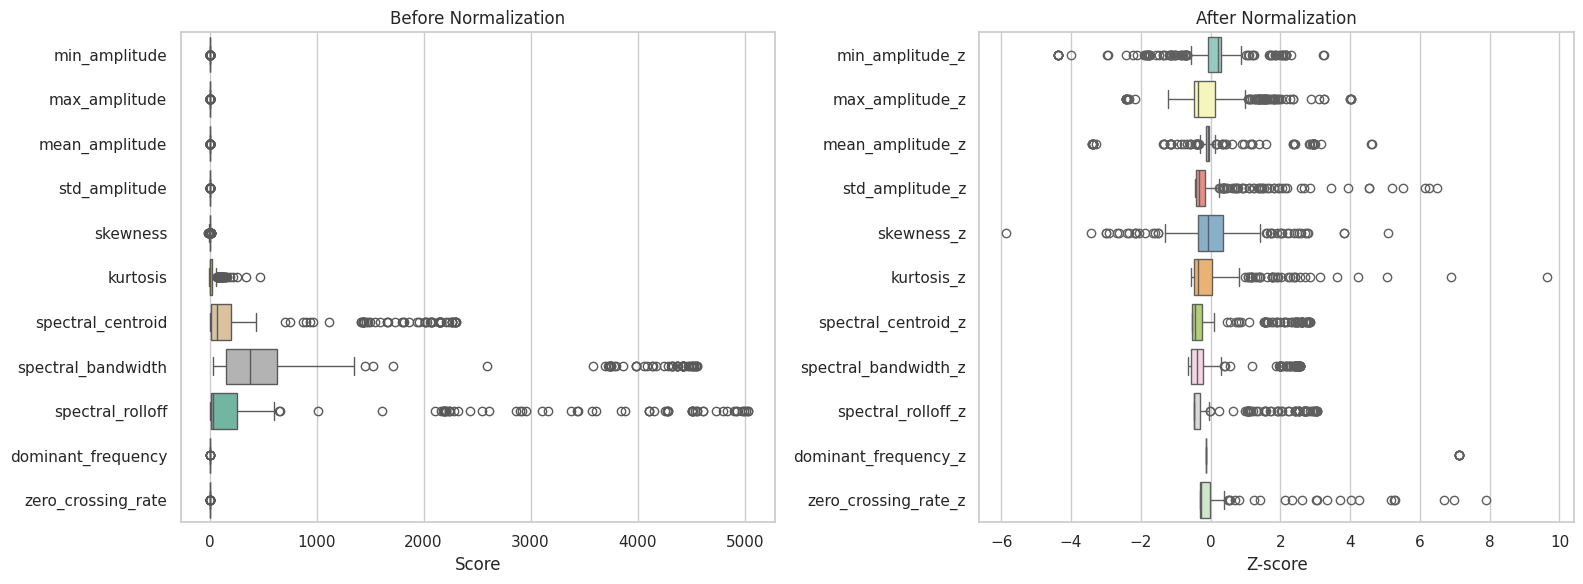

In [ ]:
# Atur style
sns.set(style="whitegrid")
plt.figure(figsize=(16, 6))

# Boxplot sebelum normalisasi
plt.subplot(1, 2, 1)
sns.boxplot(data=final_df[features_to_normalize], orient='h', palette="Set2")
plt.title("Before Normalization")
plt.xlabel("Score")

# Boxplot sesudah normalisasi
plt.subplot(1, 2, 2)
normalized_columns = [f"{col}_z" for col in features_to_normalize]
sns.boxplot(data=final_df_normalized[normalized_columns], orient='h', palette="Set3")
plt.title("After Normalization")
plt.xlabel("Z-score")

plt.tight_layout()
plt.show()

In [ ]:
final_df_normalized

species_folder                                          subfolder  \
0         Araucaria                                          Araucaria   
1         Araucaria                                          Araucaria   
2         Araucaria                                          Araucaria   
3         Araucaria                                          Araucaria   
4         Araucaria                                          Araucaria   
5         Araucaria                                          Araucaria   
6         Araucaria                                          Araucaria   
7         Araucaria                                          Araucaria   
8           Dionaea                       Dionaea/Venus - Danae/trap 2   
9           Dionaea                       Dionaea/Venus - Danae/trap 2   
10          Dionaea                       Dionaea/Venus - Danae/trap 4   
11          Dionaea                       Dionaea/Venus - Danae/trap 5   
12          Dionaea                       Dionaea/Venus - Danae/trap 1   
13          Dionaea                       Dionaea/Venus - Danae/trap 1   
14          Dionaea                       Dionaea/Venus - Danae/trap 1   
15          Dionaea                       Dionaea/Venus - Danae/trap 1   
16          Dionaea                       Dionaea/Venus - Danae/trap 3   
17          Dionaea                          Dionaea/Venus - ET/Trap 1   
18          Dionaea                Dionaea/Venus - ET/Trap 4 too young   
19          Dionaea                         Dionaea/Venus - ET/Trap 10   
20          Dionaea                         Dionaea/Venus - ET/Trap 10   
21          Dionaea                         Dionaea/Venus - ET/Trap 10   
22          Dionaea                         Dionaea/Venus - ET/Trap 10   
23          Dionaea                         Dionaea/Venus - ET/Trap 10   
24          Dionaea                Dionaea/Venus - ET/Trap 6 one timer   
25          Dionaea                Dionaea/Venus - ET/Trap 6 one timer   
26          Dionaea                  Dionaea/Venus - ET/Trap 3 closing   
27          Dionaea                  Dionaea/Venus - ET/Trap 3 closing   
28          Dionaea                         Dionaea/Venus - ET/Trap 11   
29          Dionaea                         Dionaea/Venus - ET/Trap 11   
30          Dionaea                         Dionaea/Venus - ET/Trap 11   
31          Dionaea                         Dionaea/Venus - ET/Trap 11   
32          Dionaea                         Dionaea/Venus - ET/Trap 11   
33          Dionaea                         Dionaea/Venus - ET/Trap 11   
34          Dionaea                         Dionaea/Venus - ET/Trap 11   
35          Dionaea                         Dionaea/Venus - ET/Trap 11   
36          Dionaea                Dionaea/Venus - ET/Trap 5 too young   
37          Dionaea                  Dionaea/Venus - ET/Trap 2 closing   
38          Dionaea                  Dionaea/Venus - ET/Trap 2 closing   
39          Dionaea  Dionaea/Venus - ET/Trap 7 long term/Contra middle   
40          Dionaea  Dionaea/Venus - ET/Trap 7 long term/Contra middle   
41          Dionaea     Dionaea/Venus - ET/Trap 7 long term/Ipsi right   
42          Dionaea     Dionaea/Venus - ET/Trap 7 long term/Ipsi right   
43          Dionaea     Dionaea/Venus - ET/Trap 7 long term/Ipsi right   
44          Dionaea     Dionaea/Venus - ET/Trap 7 long term/Ipsi right   
45          Dionaea     Dionaea/Venus - ET/Trap 7 long term/Ipsi right   
46          Dionaea     Dionaea/Venus - ET/Trap 7 long term/Ipsi right   
47          Dionaea   Dionaea/Venus - ET/Trap 7 long term/Contra right   
48          Dionaea      Dionaea/Venus - ET/Trap 7 long term/Ipsi left   
49          Dionaea      Dionaea/Venus - ET/Trap 7 long term/Ipsi left   
50          Dionaea      Dionaea/Venus - ET/Trap 7 long term/Ipsi left   
51          Dionaea      Dionaea/Venus - ET/Trap 7 long term/Ipsi left   
52          Dionaea      Dionaea/Venus - ET/Trap 7 long term/Ipsi left   
53       

In [ ]:
final_df_normalized.columns.tolist()

['species_folder',
 'subfolder',
 'wav_file',
 'has_event_txt',
 'wav_path',
 'event_path',
 'duration_sec',
 'sampling_rate',
 'event_count',
 'event_lines',
 'event_outlier',
 'amplitude_outlier',
 'short_duration',
 'missing_event_txt',
 'extreme_zcr',
 'min_amplitude_z',
 'max_amplitude_z',
 'mean_amplitude_z',
 'std_amplitude_z',
 'skewness_z',
 'kurtosis_z',
 'spectral_centroid_z',
 'spectral_bandwidth_z',
 'spectral_rolloff_z',
 'dominant_frequency_z',
 'zero_crossing_rate_z']

ekstraksi stimulus

In [ ]:
def extract_event_info(event_lines):
    parsed_events = []
    for line in event_lines:
        if line.startswith("#") or not line.strip():
            continue
        try:
            parts = line.split(",")
            stimulus_type = parts[0].strip()
            time_sec = float(parts[1])
            parsed_events.append({"stimulus_type": stimulus_type, "time_sec": time_sec})
        except Exception as e:
            print(f"⚠️ Failed to parse line: {line} | Error: {e}")
    return parsed_events

In [ ]:
# Pastikan kolom event_lines dibawa dari final_df
final_df_normalized['event_lines'] = final_df['event_lines']

In [ ]:
final_df_normalized['parsed_events'] = final_df_normalized['event_lines'].apply(extract_event_info)

In [ ]:
# Lihat salah satu record
final_df_normalized[['wav_file', 'parsed_events']].sample(3)

wav_file  \
295  Santiago de Chile Plectranthus_1 Stimulus Fire...   
222              BYB_Recording_2023-01-05_16.04.29.wav   
299              BYB_Recording_2023-01-05_16.56.14.wav   

                                         parsed_events  
295  [{'stimulus_type': '1', 'time_sec': 17.2495}, ...  
222  [{'stimulus_type': '1', 'time_sec': 3.1536}, {...  
299  [{'stimulus_type': '1', 'time_sec': 2.7998}, {...

In [ ]:
stimulus_types = final_df_normalized['parsed_events'].explode().apply(lambda x: x['stimulus_type'] if isinstance(x, dict) else None)
print(stimulus_types.value_counts())

parsed_events
1                        308
2                        214
3                          8
6                          3
4                          2
5                          1
_ch0_neuron0               1
_neuron0threshhig2160      1
_neuron0threshlow1891      1
Name: count, dtype: int64


In [ ]:
final_df_normalized

species_folder                                          subfolder  \
0         Araucaria                                          Araucaria   
1         Araucaria                                          Araucaria   
2         Araucaria                                          Araucaria   
3         Araucaria                                          Araucaria   
4         Araucaria                                          Araucaria   
5         Araucaria                                          Araucaria   
6         Araucaria                                          Araucaria   
7         Araucaria                                          Araucaria   
8           Dionaea                       Dionaea/Venus - Danae/trap 2   
9           Dionaea                       Dionaea/Venus - Danae/trap 2   
10          Dionaea                       Dionaea/Venus - Danae/trap 4   
11          Dionaea                       Dionaea/Venus - Danae/trap 5   
12          Dionaea                       Dionaea/Venus - Danae/trap 1   
13          Dionaea                       Dionaea/Venus - Danae/trap 1   
14          Dionaea                       Dionaea/Venus - Danae/trap 1   
15          Dionaea                       Dionaea/Venus - Danae/trap 1   
16          Dionaea                       Dionaea/Venus - Danae/trap 3   
17          Dionaea                          Dionaea/Venus - ET/Trap 1   
18          Dionaea                Dionaea/Venus - ET/Trap 4 too young   
19          Dionaea                         Dionaea/Venus - ET/Trap 10   
20          Dionaea                         Dionaea/Venus - ET/Trap 10   
21          Dionaea                         Dionaea/Venus - ET/Trap 10   
22          Dionaea                         Dionaea/Venus - ET/Trap 10   
23          Dionaea                         Dionaea/Venus - ET/Trap 10   
24          Dionaea                Dionaea/Venus - ET/Trap 6 one timer   
25          Dionaea                Dionaea/Venus - ET/Trap 6 one timer   
26          Dionaea                  Dionaea/Venus - ET/Trap 3 closing   
27          Dionaea                  Dionaea/Venus - ET/Trap 3 closing   
28          Dionaea                         Dionaea/Venus - ET/Trap 11   
29          Dionaea                         Dionaea/Venus - ET/Trap 11   
30          Dionaea                         Dionaea/Venus - ET/Trap 11   
31          Dionaea                         Dionaea/Venus - ET/Trap 11   
32          Dionaea                         Dionaea/Venus - ET/Trap 11   
33          Dionaea                         Dionaea/Venus - ET/Trap 11   
34          Dionaea                         Dionaea/Venus - ET/Trap 11   
35          Dionaea                         Dionaea/Venus - ET/Trap 11   
36          Dionaea                Dionaea/Venus - ET/Trap 5 too young   
37          Dionaea                  Dionaea/Venus - ET/Trap 2 closing   
38          Dionaea                  Dionaea/Venus - ET/Trap 2 closing   
39          Dionaea  Dionaea/Venus - ET/Trap 7 long term/Contra middle   
40          Dionaea  Dionaea/Venus - ET/Trap 7 long term/Contra middle   
41          Dionaea     Dionaea/Venus - ET/Trap 7 long term/Ipsi right   
42          Dionaea     Dionaea/Venus - ET/Trap 7 long term/Ipsi right   
43          Dionaea     Dionaea/Venus - ET/Trap 7 long term/Ipsi right   
44          Dionaea     Dionaea/Venus - ET/Trap 7 long term/Ipsi right   
45          Dionaea     Dionaea/Venus - ET/Trap 7 long term/Ipsi right   
46          Dionaea     Dionaea/Venus - ET/Trap 7 long term/Ipsi right   
47          Dionaea   Dionaea/Venus - ET/Trap 7 long term/Contra right   
48          Dionaea      Dionaea/Venus - ET/Trap 7 long term/Ipsi left   
49          Dionaea      Dionaea/Venus - ET/Trap 7 long term/Ipsi left   
50          Dionaea      Dionaea/Venus - ET/Trap 7 long term/Ipsi left   
51          Dionaea      Dionaea/Venus - ET/Trap 7 long term/Ipsi left   
52          Dionaea      Dionaea/Venus - ET/Trap 7 long term/Ipsi left   
53       

segmentasi sinyal berdasarkan event marker

In [ ]:
def segment_signal(wav_path, events, window_size=5.0):
    try:
        signal, sr = librosa.load(wav_path, sr=None)
        segments = []
        for e in events:
            start_sample = int(e['time_sec'] * sr)
            end_sample = int((e['time_sec'] + window_size) * sr)
            if end_sample <= len(signal):
                segment = signal[start_sample:end_sample]
                segments.append({
                    "stimulus_type": e['stimulus_type'],
                    "start_sec": e['time_sec'],
                    "segment": segment
                })
        return segments
    except Exception as e:
        print(f"❌ Error processing {wav_path}: {e}")
        return []

In [ ]:
segmented_all = []

for i, row in final_df_normalized.iterrows():
    if isinstance(row['parsed_events'], list) and row['parsed_events']:
        segments = segment_signal(row['wav_path'], row['parsed_events'], window_size=5.0)
        segmented_all.extend([{
            "wav_file": row['wav_file'],
            "species": row['species_folder'],
            "stimulus_type": s['stimulus_type'],
            "start_sec": s['start_sec'],
            "segment": s['segment']
        } for s in segments])

In [ ]:
print(segmented_all[0].keys())

dict_keys(['wav_file', 'species', 'stimulus_type', 'start_sec', 'segment'])


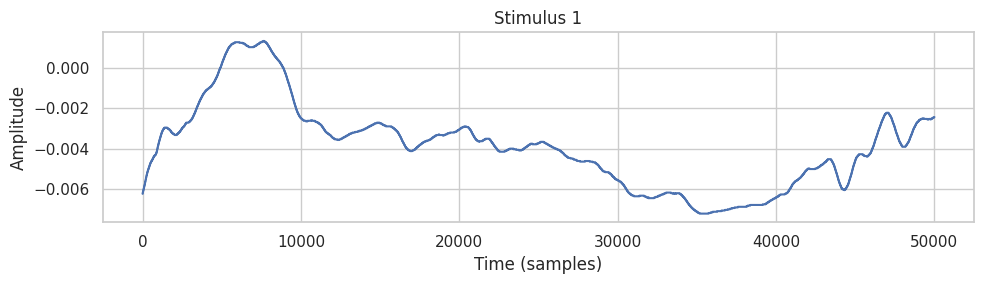

In [ ]:
#visualisasi
def plot_segment(segment, title=None):
    plt.figure(figsize=(10, 3))
    plt.plot(segment)
    plt.title(title or "Signal Segment")
    plt.xlabel("Time (samples)")
    plt.ylabel("Amplitude")
    plt.tight_layout()
    plt.show()

# Contoh plot segmen
plot_segment(segmented_all[0]['segment'], f"Stimulus {segmented_all[0]['stimulus_type']}")

In [ ]:
def segment_signal_timebased(wav_path, wav_file=None, species=None, window_size=5.0, hop_size=5.0):
    try:
        signal, sr = librosa.load(wav_path, sr=None)
        total_duration = len(signal) / sr
        segments = []
        current_start = 0.0

        while current_start + window_size <= total_duration:
            start_sample = int(current_start * sr)
            end_sample = int((current_start + window_size) * sr)
            segment = signal[start_sample:end_sample]
            segments.append({
                "segment": segment,
                "start_sec": current_start,
                "stimulus_type": None,
                "wav_file": wav_file,
                "species": species,
                "source": "time"
            })
            current_start += hop_size

        return segments
    except Exception as e:
        print(f"❌ Error processing {wav_path}: {e}")
        return []

In [ ]:
segmented_all = []

for _, row in final_df_normalized.iterrows():
    # Event-based
    if isinstance(row['event_lines'], list) and row['event_lines']:
        parsed_events = extract_event_info(row['event_lines'])
        segments_event = segment_signal(row['wav_path'], parsed_events)
        segmented_all.extend([{
            "segment": s['segment'],
            "start_sec": s['start_sec'],
            "stimulus_type": s['stimulus_type'],
            "wav_file": row['wav_file'],
            "species": row['species_folder'],
            "source": "event"
        } for s in segments_event])

    # Time-based
    segments_time = segment_signal_timebased(
        wav_path=row['wav_path'],
        wav_file=row['wav_file'],
        species=row['species_folder'],
        window_size=5.0,
        hop_size=5.0
    )
    segmented_all.extend(segments_time)

print(f"Total segmented: {len(segmented_all)}")

Total segmented: 3719


In [ ]:
# Cek distribusi panjang sinyal
lengths = [len(s['segment']) for s in segmented_all]
print("📊 Segment length (samples):")
print("Min:", min(lengths), "| Max:", max(lengths), "| Mean:", sum(lengths)/len(lengths))

# Filter terlalu pendek (misal: < 32 samples)
segmented_all = [s for s in segmented_all if len(s['segment']) >= 32]
print("✅ Segmen yang lolos filter panjang:", len(segmented_all))


📊 Segment length (samples):
Min: 24999 | Max: 220500 | Mean: 61640.489378865284
✅ Segmen yang lolos filter panjang: 3719


In [ ]:
pip install PyWavelets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 36.8 MB/s eta 0:00:00


In [ ]:
import pywt

In [ ]:
from scipy.stats import skew, kurtosis

def get_max_level(signal_len, wavelet='db4'):
    wavelet_obj = pywt.Wavelet(wavelet)
    return pywt.dwt_max_level(signal_len, wavelet_obj.dec_len)

def wavelet_denoise(signal, wavelet='db4', level=2, threshold_mode='soft'):
    coeffs = pywt.wavedec(signal, wavelet, level=level)
    sigma = np.std(coeffs[-1])
    threshold = sigma / 2
    coeffs_denoised = [coeffs[0]] + [
        pywt.threshold(c, threshold, mode=threshold_mode) for c in coeffs[1:]
    ]
    return pywt.waverec(coeffs_denoised, wavelet)

def extract_full_features(signal, wavelet='db4', level=2, apply_denoise=True):
    try:
        # Level adaptif: pilih level maksimum sesuai panjang sinyal
        max_level = get_max_level(len(signal), wavelet)
        if max_level < 1:
            raise ValueError(f"Signal too short for any DWT level: {len(signal)} samples")
        level = min(level, max_level)

        # Denoising
        if apply_denoise:
            signal = wavelet_denoise(signal, wavelet, level)

        # DWT features
        coeffs = pywt.wavedec(signal, wavelet, level=level, mode='periodization')
        dwt_features = np.concatenate(coeffs)

        # Hjorth features
        first_deriv = np.diff(signal)
        second_deriv = np.diff(first_deriv)
        var_zero = np.var(signal)
        var_d1 = np.var(first_deriv)
        var_d2 = np.var(second_deriv)
        activity = var_zero
        mobility = np.sqrt(var_d1 / var_zero) if var_zero != 0 else 0
        complexity = (np.sqrt(var_d2 / var_d1) / mobility) if var_d1 != 0 and mobility != 0 else 0
        hjorth_feats = [activity, mobility, complexity]

        # Statistical features
        stats_feats = [
            np.mean(signal),
            np.std(signal),
            skew(signal),
            kurtosis(signal),
            np.sum(np.square(signal))  # energy
        ]

        return np.concatenate([dwt_features, hjorth_feats, stats_feats])

    except Exception as e:
        print(f"❌ Error extracting features: {e}")
        return None

In [ ]:
# Step 1: Flag outlier dari DataFrame utama
final_df_normalized["is_outlier"] = (
    final_df_normalized["event_outlier"].fillna(False)
    | final_df_normalized["amplitude_outlier"].fillna(False)
    | final_df_normalized["short_duration"].fillna(False)
    | final_df_normalized["missing_event_txt"].fillna(False)
    | final_df_normalized["extreme_zcr"].fillna(False)
)

# Step 2: Segmentasi ulang dengan flag is_outlier dimasukkan ke segmented_all
segmented_all = []

for _, row in final_df_normalized.iterrows():
    # Event-based
    if isinstance(row['event_lines'], list) and row['event_lines']:
        parsed_events = extract_event_info(row['event_lines'])
        segments_event = segment_signal(row['wav_path'], parsed_events)
        segmented_all.extend([{
            "segment": s['segment'],
            "start_sec": s['start_sec'],
            "stimulus_type": s['stimulus_type'],
            "wav_file": row['wav_file'],
            "species": row['species_folder'],
            "source": "event",
            "is_outlier": row["is_outlier"]
        } for s in segments_event])

    # Time-based
    segments_time = segment_signal_timebased(
        wav_path=row['wav_path'],
        wav_file=row['wav_file'],
        species=row['species_folder'],
        window_size=5.0,
        hop_size=5.0
    )
    segmented_all.extend([{
        "segment": s['segment'],
        "start_sec": s['start_sec'],
        "stimulus_type": None,
        "wav_file": row['wav_file'],
        "species": row['species_folder'],
        "source": "time",
        "is_outlier": row["is_outlier"]
    } for s in segments_time])

print(f"📦 Total segmented: {len(segmented_all)}")

# Step 3: Ekstrak fitur hanya dari segmen non-outlier
train_segments = [s for s in segmented_all if not s.get('is_outlier', False)]

feature_vectors = []
metadata = []
expected_length = None

for seg in train_segments:
    features = extract_full_features(seg['segment'])

    if features is None:
        continue

    if expected_length is None:
        expected_length = len(features)
    elif len(features) != expected_length:
        print(f"⚠️ Skipped: {len(features)} != {expected_length}")
        continue

    feature_vectors.append(features)
    metadata.append({
        "wav_file": seg['wav_file'],
        "species": seg['species'],
        "stimulus_type": seg.get('stimulus_type'),
        "start_sec": seg['start_sec'],
        "source": seg['source']
    })

print(f"✅ Jumlah fitur valid (non-outlier): {len(feature_vectors)}")

📦 Total segmented: 3719
✅ Jumlah fitur valid (non-outlier): 619


In [ ]:
X_train = np.array(feature_vectors)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

In [ ]:
print(segmented_all[0].keys())

dict_keys(['segment', 'start_sec', 'stimulus_type', 'wav_file', 'species', 'source', 'is_outlier'])


In [ ]:
print("Jumlah fitur valid:", len(feature_vectors))
print("Contoh shape satu fitur:", feature_vectors[0].shape if len(feature_vectors) > 0 else "Kosong")

Jumlah fitur valid: 619
Contoh shape satu fitur: (50008,)


In [ ]:
from tensorflow.keras.layers import LeakyReLU, BatchNormalization

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, UpSampling1D, Flatten, Dense, Reshape
from tensorflow.keras import regularizers

def build_cnn_autoencoder_bn(input_length):
    input_layer = Input(shape=(input_length, 1))

    # Encoder
    x = Conv1D(16, kernel_size=4, strides=2, padding='same')(input_layer)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.01)(x)

    x = Conv1D(32, kernel_size=4, strides=2, padding='same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.01)(x)

    # Bottleneck
    x = Conv1D(8, kernel_size=1, strides=1, padding='same', kernel_regularizer=regularizers.l2(1e-4))(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.01)(x)

    # Decoder
    x = UpSampling1D(size=2)(x)
    x = Conv1D(32, kernel_size=4, padding='same', kernel_regularizer=regularizers.l2(1e-4))(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.01)(x)

    x = UpSampling1D(size=2)(x)
    x = Conv1D(16, kernel_size=4, padding='same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.01)(x)

    # 🔚 Output
    output_layer = Conv1D(1, kernel_size=1, activation='linear', padding='same')(x)

    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer='adam', loss='mse')

    return model

In [ ]:
# Gunakan model
input_length = X_train.shape[1]
model = build_cnn_autoencoder_bn(input_length)
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 50008, 1)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 25004, 16)      │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 25004, 16)      │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 25004, 16)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 12502, 32)      │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 12502, 32)      │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 12502, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 12502, 8)       │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12502, 8)       │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 12502, 8)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling1d (UpSampling1D)    │ (None, 25004, 8)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 25004, 32)      │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 25004, 32)      │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 25004, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling1d_1 (UpSampling1D)  │ (None, 50008, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 50008, 16)      │         2,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 50008, 16)      │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 50008, 16)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 50008, 1)       │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,977 (23.35 KB)

 Trainable params: 5,769 (22.54 KB)

 Non-trainable params: 208 (832.00 B)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

lr_schedule = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=2,           # kalau 2x epoch val_loss stagnan, turunin LR
    verbose=1,
    min_lr=1e-6
)

# Early stop kalau val_loss gak membaik
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=4,                # kasih kesempatan turun pelan
    restore_best_weights=True,
    verbose=1,
    min_delta=1e-5             # perubahan kecil pun dianggap signifikan
)


# Simpan model terbaik ke file
checkpoint = ModelCheckpoint(
    filepath='best_model.keras',     # ganti ke .h5 kalau kamu mau
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

# Training dengan callback kombo
history = model.fit(
    X_train, X_train,
    epochs=30,                 # fleksibel, stop otomatis
    batch_size=16,
    validation_split=0.2,
    shuffle=True,
    verbose=1,
    callbacks=[early_stop, lr_schedule, checkpoint]
)

Epoch 1/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 1.9907
Epoch 1: val_loss improved from inf to 1.88690, saving model to best_model.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 89s 3s/step - loss: 1.9723 - val_loss: 1.8869 - learning_rate: 0.0010
Epoch 2/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 0.5189
Epoch 2: val_loss improved from 1.88690 to 1.73264, saving model to best_model.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 77s 3s/step - loss: 0.5148 - val_loss: 1.7326 - learning_rate: 0.0010
Epoch 3/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 0.3432
Epoch 3: val_loss improved from 1.73264 to 1.55755, saving model to best_model.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 84s 3s/step - loss: 0.3388 - val_loss: 1.5576 - learning_rate: 0.0010
Epoch 4/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 0.1519
Epoch 4: val_loss improved from 1.55755 to 1.37248, saving model to best_model.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - loss: 0.1535 - val_loss: 1.3725 - learning_rate: 0.0010
Epoch 5/30
31/31 ━━━

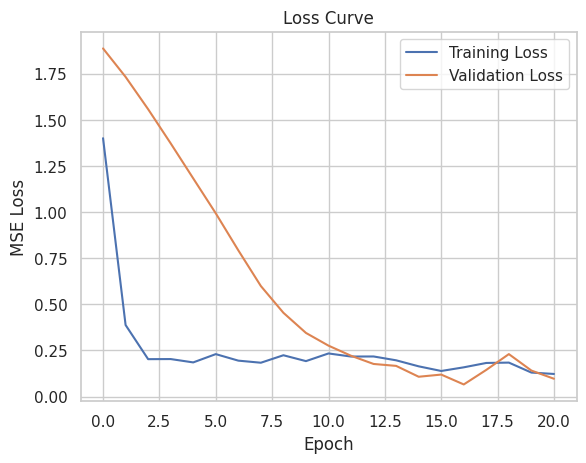

In [67]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)
plt.title('Loss Curve')
plt.show()

In [68]:
X_pred = model.predict(X_train)

20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 887ms/step


In [69]:
reconstruction_error = np.mean((X_train - X_pred) ** 2, axis=(1, 2))

In [70]:
threshold = np.mean(reconstruction_error) + 3 * np.std(reconstruction_error)
print(f"Anomaly threshold: {threshold:.6f}")

Anomaly threshold: 0.471947


In [71]:
test_segments = segmented_all  # semua segmen (event + time, with/without outlier)

test_vectors = []
test_metadata = []

for seg in test_segments:
    features = extract_full_features(seg['segment'])

    if features is None or len(features) != X_train.shape[1]:
        continue

    test_vectors.append(features)
    test_metadata.append({
        "wav_file": seg['wav_file'],
        "species": seg['species'],
        "stimulus_type": seg.get('stimulus_type'),
        "start_sec": seg['start_sec'],
        "source": seg['source'],
        "is_outlier": seg.get('is_outlier', False)  # ground truth
    })

# Convert ke array
X_test = np.array(test_vectors).reshape((len(test_vectors), X_train.shape[1], 1))

# Prediksi & hitung error
X_test_pred = model.predict(X_test)
reconstruction_error_test = np.mean((X_test - X_test_pred) ** 2, axis=(1, 2))

# Bandingkan dengan threshold
is_anomaly_test = reconstruction_error_test > 0.012512

# Gabungkan semua
import pandas as pd
df_test = pd.DataFrame(test_metadata)
df_test["reconstruction_error"] = reconstruction_error_test
df_test["is_anomaly_predicted"] = is_anomaly_test

97/97 ━━━━━━━━━━━━━━━━━━━━ 93s 949ms/step


In [72]:
df_test["is_anomaly_predicted"].value_counts()

is_anomaly_predicted
True     2293
False     781
Name: count, dtype: int64

In [73]:
from sklearn.metrics import classification_report

print(classification_report(df_test["is_outlier"], df_test["is_anomaly_predicted"]))

              precision    recall  f1-score   support

       False       0.31      0.39      0.35       619
        True       0.84      0.78      0.81      2455

    accuracy                           0.70      3074
   macro avg       0.57      0.59      0.58      3074
weighted avg       0.73      0.70      0.72      3074



In [74]:
import matplotlib.pyplot as plt

def plot_anomaly_timeline(df, file_name):
    subset = df[df['wav_file'] == file_name]

    plt.figure(figsize=(12, 4))
    colors = ['red' if is_anom else 'blue' for is_anom in subset['is_anomaly_predicted']]

    plt.scatter(subset['start_sec'], subset['reconstruction_error'], c=colors, alpha=0.7)
    plt.axhline(threshold, color='gray', linestyle='--', label='Threshold')

    plt.title(f"Anomaly Timeline - {file_name}")
    plt.xlabel("Time (seconds)")
    plt.ylabel("Reconstruction Error")
    plt.legend()
    plt.grid(True)
    plt.show()

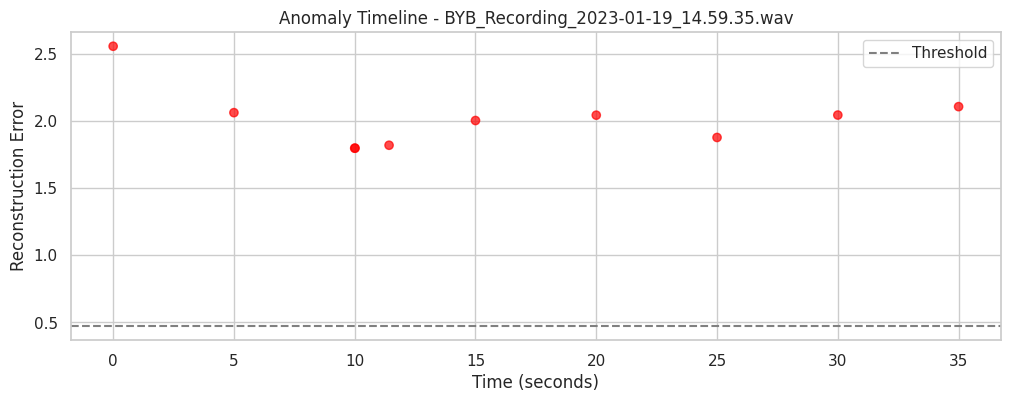

In [75]:
plot_anomaly_timeline(df_test, "BYB_Recording_2023-01-19_14.59.35.wav")

In [ ]:
anomalous_segments = []

for seg, error in zip(test_metadata, reconstruction_error):
    if error > threshold:
        anomalous_segments.append((seg['wav_file'], seg['start_sec'], error))

# Tampilkan contoh
for i, (f, t, e) in enumerate(anomalous_segments[:5]):
    print(f"[{i}] {f} | Start: {t}s | Error: {e:.5f}")

[0] BYB_Recording_2022-10-14_09.09.29.wav | Start: 15.0s | Error: 0.01379
[1] BYB_Recording_2023-01-19_14.51.16.wav | Start: 20.0s | Error: 0.01470
[2] BYB_Recording_2023-01-19_14.59.35.wav | Start: 0.0s | Error: 0.01916
[3] BYB_Recording_2023-01-19_14.59.35.wav | Start: 30.0s | Error: 0.02160
[4] BYB_Recording_2023-01-19_14.59.35.wav | Start: 35.0s | Error: 0.02835


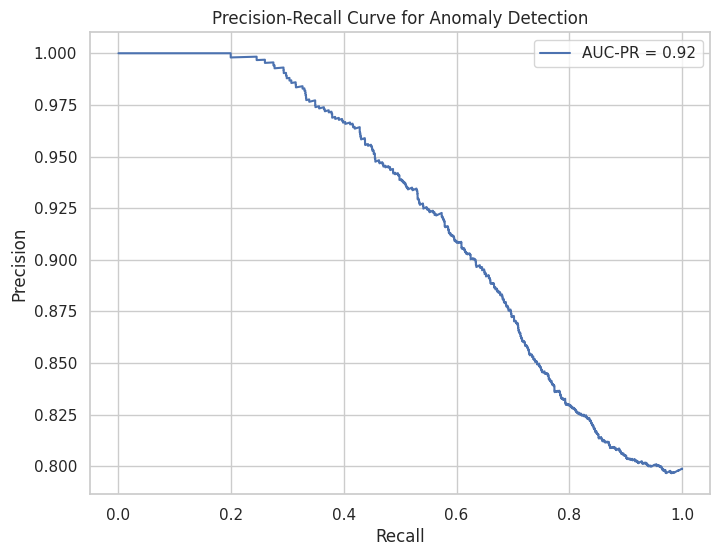

In [76]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

y_true = df_test["is_outlier"].astype(int).values
y_scores = df_test["reconstruction_error"].values

precision, recall, _ = precision_recall_curve(y_true, y_scores)
avg_precision = average_precision_score(y_true, y_scores)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f"AUC-PR = {avg_precision:.2f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for Anomaly Detection")
plt.grid(True)
plt.legend()
plt.show()

In [77]:
total_dimensi = sum(len(vec) for vec in feature_vectors)
print(f"Total dimensi dari seluruh segmen: {total_dimensi:,}")

Total dimensi dari seluruh segmen: 30,954,952


In [78]:
# Misalnya kamu sudah punya feature_vectors hasil ekstraksi
import numpy as np

sample_vector = np.array(feature_vectors[0])  # ambil satu sampel
print(f"Total dimensi fitur per segmen: {sample_vector.shape[0]:,}")

Total dimensi fitur per segmen: 50,008
